In [1]:
import pandas as pd

# CSV 파일 불러오기
df = pd.read_csv('셔틀버스 이용.csv', encoding='euc-kr')

# 데이터 확인
df.head()

,Grade,Transport,Experience,City/Privince,District/Town,Reason_N,DesiredStop,After,Feedback,WeeklyUse,City/Privince2,District/Town2,CurrentStop,Satisfaction,Reason_Y,Discomfort,DesiredStop2,Feedback2
0,2학년,"지하철, 버스 (셔틀버스 미포함), 셔틀버스",네,NaN,NaN,NaN,NaN,NaN,NaN,5.0,서울,성북구 동소문동,길음역,4.0,학교까지 빠른 도착 시간,안내와는 다른 셔틀버스 출발. 도착 시간,없음,NaN
1,2학년,"지하철, 셔틀버스",네,NaN,NaN,NaN,NaN,NaN,NaN,4.0,서울,성북구 동소문동,길음역,5.0,출발 위치의 편리함,실시간 셔틀버스 위치 파악의 어려움,없음,NaN
2,2학년,"택시, 지하철, 버스 (셔틀버스 미포함), 셔틀버스",네,NaN,NaN,NaN,NaN,NaN,NaN,3.0,수도권(서울 제외),의정부시 산곡동,길음역,4.0,학교까지 빠른 도착 시간,입석 불가,당고개역,NaN
3,2학년,버스 (셔틀버스 미포함),아니요,서울,은평구 진관동,"거주지 근처와 셔틀버스 지원 위치의 거리가 멀다, 사람이 많아 못탈 때가 많다",구파발역,네,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2학년,걷기,아니요,서울,성북구 정릉동,걷는 게 좋아서 이용하지 않음,없음,아니요,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
# 셔틀 이용 경험에 따라 나누기
cols1 = [9, 10, 11, 12, 13, 14, 15, 16, 17]
df_yes = df.loc[df['Experience'] == '네'].iloc[:, cols1]

cols2 = [3, 4, 5, 6, 7, 8]
df_no = df.loc[df['Experience'] == '아니요'].iloc[:, cols2]

In [3]:
# 열이름 정정
df_yes.rename(columns={'City/Privince2': 'City/Province'}, inplace=True)
df_yes.rename(columns={'District/Town2': 'District/Town'}, inplace=True)
df_yes.rename(columns={'DesiredStop2': 'DesiredStop'}, inplace = True)
df_yes.rename(columns={'Feedback2': 'Feedback'}, inplace = True)

print("셔틀버스 경험:")
df_yes.head()

셔틀버스 경험:


,WeeklyUse,City/Province,District/Town,CurrentStop,Satisfaction,Reason_Y,Discomfort,DesiredStop,Feedback
0,5.0,서울,성북구 동소문동,길음역,4.0,학교까지 빠른 도착 시간,안내와는 다른 셔틀버스 출발. 도착 시간,없음,NaN
1,4.0,서울,성북구 동소문동,길음역,5.0,출발 위치의 편리함,실시간 셔틀버스 위치 파악의 어려움,없음,NaN
2,3.0,수도권(서울 제외),의정부시 산곡동,길음역,4.0,학교까지 빠른 도착 시간,입석 불가,당고개역,NaN
9,2.0,서울,성북구 정릉동,시청역,3.0,학교까지 빠른 도착 시간,셔틀버스 운행 시간,송내역,더 많은곳에서 출발해주면 좋겠다. 너무 서울지역에만 국한되어 있는듯하다.
10,1.0,수도권(서울 제외),하남시,길음역,4.0,무료,실시간 셔틀버스 위치 파악의 어려움,없음,NaN


In [4]:
print("셔틀버스 미경험:")
df_no.rename(columns={'City/Privince': 'City/Province'}, inplace=True)
df_no.head()

셔틀버스 미경험:


,City/Province,District/Town,Reason_N,DesiredStop,After,Feedback
3,서울,은평구 진관동,"거주지 근처와 셔틀버스 지원 위치의 거리가 멀다, 사람이 많아 못탈 때가 많다",구파발역,네,NaN
4,서울,성북구 정릉동,걷는 게 좋아서 이용하지 않음,없음,아니요,NaN
5,서울,성북구 정릉동,교내기숙사 거주,없음,아니요,NaN
6,서울,성북구 정릉동,집이 가까워 셔틀을 탈 필요가 없음.,없음,아니요,NaN
7,서울,구로구 고척동,거주지 근처와 셔틀버스 지원 위치의 거리가 멀다,없음,네,NaN


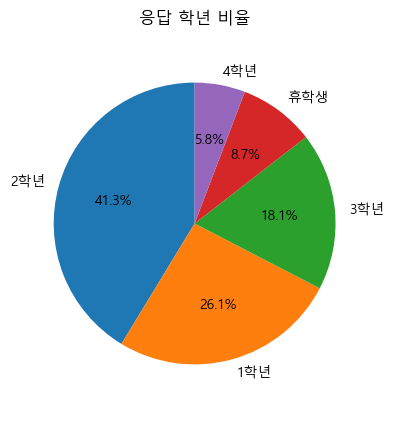

In [5]:
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

# 한글 폰트 설정
font_path = 'C:/Windows/Fonts/malgun.ttf'  # Malgun Gothic 글꼴 경로
font_manager.fontManager.addfont(font_path)
rc('font', family='Malgun Gothic')

# 'Grade' 열의 값의 비율 계산
grade_counts = df['Grade'].value_counts(normalize=True)

# 원그래프 시각화
plt.figure(figsize=(4, 5))
plt.pie(grade_counts, labels=grade_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('응답 학년 비율')
plt.axis('equal')  # 원형으로 표시하기 위해 x와 y 비율을 동일하게 설정
plt.show()

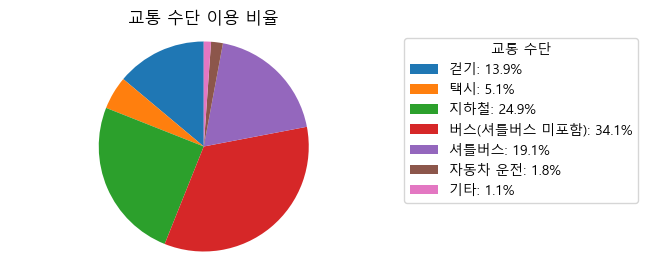

In [6]:
import matplotlib.pyplot as plt

# 데이터 정의
labels = ['걷기', '택시', '지하철', '버스(셔틀버스 미포함)', '셔틀버스', '자동차 운전', '기타']
sizes = [27.5, 10.1, 49.3, 67.4, 37.7, 3.6, 2.2]

# 전체 합계 계산
total = sum(sizes)

# 비율을 100이 되도록 변환
sizes_percentage = [size / total * 100 for size in sizes]

# 원그래프 시각화
plt.figure(figsize=(5, 3))

# autopct 매개변수를 None으로 설정하여 퍼센트 표시 비활성화
wedges, _ = plt.pie(sizes_percentage, labels=None, startangle=90)

# 레전드 추가: 퍼센트를 포함
labels_with_pct = [f'{label}: {size:.1f}%' for label, size in zip(labels, sizes_percentage)]
plt.legend(labels_with_pct, title="교통 수단", loc='upper left', bbox_to_anchor=(1, 1), fontsize=10)

plt.title('교통 수단 이용 비율')
plt.axis('equal')  # 원형으로 표시하기 위해 x와 y 비율을 동일하게 설정
plt.show()

<br>

## 서울/수도권/비수도권 인원 파악

In [8]:
df_yes['City/Province'].value_counts()

City/Province
서울            48
수도권(서울 제외)    33
비수도권(지방)       1
Name: count, dtype: int64

In [9]:
df_no['City/Province'].value_counts()

City/Province
서울            51
수도권(서울 제외)     5
Name: count, dtype: int64

#### <span style = "color: blue;"> 비수도권(지방) 인원이 적어서 "서울O"과 "서울X"로 나누기로 결정함!!

In [11]:
# 'City/Province' 열을 '서울O'와 '서울X'로 변환
df_yes['City/Province'] = df_yes['City/Province'].apply(lambda x: '서울O' if x == '서울' else '서울X')

# 변환된 데이터 확인
print(df_yes['City/Province'].value_counts())

City/Province
서울O    48
서울X    34
Name: count, dtype: int64


In [12]:
# 'City/Province' 열을 '서울O'와 '서울X'로 변환
df_no['City/Province'] = df_no['City/Province'].apply(lambda x: '서울O' if x == '서울' else '서울X')

# 변환된 데이터 확인
print(df_no['City/Province'].value_counts())

City/Province
서울O    51
서울X     5
Name: count, dtype: int64


#### <span style = "color: blue;"> df_1: 서울O/서울X<br> df_2: 서울 -> 구별로<br>** 서울 외 지역은 시까지만!!

### df_1 구하기

In [15]:
# 'District/Town' 열 삭제
df_yes1 = df_yes.copy()
df_yes1 = df_yes1.drop(columns=['District/Town'])

# 'City/Province' 열을 기준으로 정렬
df_yes1 = df_yes1.sort_values(by='City/Province').reset_index(drop=True)

# 정렬된 데이터프레임 확인
df_yes1

,WeeklyUse,City/Province,CurrentStop,Satisfaction,Reason_Y,Discomfort,DesiredStop,Feedback
0,5.0,서울O,길음역,4.0,학교까지 빠른 도착 시간,안내와는 다른 셔틀버스 출발. 도착 시간,없음,NaN
1,3.0,서울O,길음역,4.0,무료,"안내와는 다른 셔틀버스 출발. 도착 시간, 셔틀버스 운행 시간",없음,하교시간 배차 늘리기
2,1.0,서울O,불광역,2.0,학교까지 빠른 도착 시간,셔틀버스 운행 시간,연신내역,NaN
3,1.0,서울O,길음역,3.0,학교까지 빠른 도착 시간,배차 간격,"수유역, 북한산보국문역, 정릉역",소액의 이용 요금을 받아 버스 추가 투입 비용으로 활용하여 배차간격을 획기적으로 줄...
4,4.0,서울O,길음역,4.0,학교까지 빠른 도착 시간,"안내와는 다른 셔틀버스 출발. 도착 시간, 실시간 셔틀버스 위치 파악의 어려움, 배...","상도역 또는 이수역, 사당역, 숭실대입구역, 장승배기역, 동작역",NaN
...,...,...,...,...,...,...,...,...
77,2.0,서울X,길음역,2.0,학교까지 빠른 도착 시간,안내와는 다른 셔틀버스 출발. 도착 시간,NaN,미운영할꺼면사전에공지바람
78,2.0,서울X,길음역,4.0,학교까지 빠른 도착 시간,"배차 간격, 셔틀버스 운행 시간",노원역,NaN
79,2.0,서울X,길음역,4.0,학교까지 빠른 도착 시간,"실시간 셔틀버스 위치 파악의 어려움, 셔틀버스 운행 시간",사당역,NaN
80,3.0,서울X,길음역,3.0,무료,"안내와는 다른 셔틀버스 출발. 도착 시간, 배차 간격",사당역,하교가 몰리는 시간 (오후 4~6시)에는 셔틀 배차간격이 더 촘촘했으면 좋겠습니다 ...


In [16]:
# 'District/Town' 열 삭제
df_no1 = df_no.copy()
df_no1 = df_no1.drop(columns=['District/Town'])

# 'City/Province' 열을 기준으로 정렬
df_no1 = df_no1.sort_values(by='City/Province').reset_index(drop=True)

# 정렬된 데이터프레임 확인
df_no1

,City/Province,Reason_N,DesiredStop,After,Feedback
0,서울O,"거주지 근처와 셔틀버스 지원 위치의 거리가 멀다, 사람이 많아 못탈 때가 많다",구파발역,네,NaN
1,서울O,후문 근처라 탈 필요가 없다,없음,아니요,NaN
2,서울O,거주지와 학교가 가까워서,없음,아니요,NaN
3,서울O,거주지 근처와 셔틀버스 지원 위치의 거리가 멀다,증산역,네,NaN
4,서울O,거주지 근처와 셔틀버스 지원 위치의 거리가 멀다,면목역,네,NaN
5,서울O,거주지 근처와 셔틀버스 지원 위치의 거리가 멀다,시청역,네,"아침에만 운영하기에, 자주 이용하기 어렵다. 아침뿐만 아니라 오후에도 운영하는 셔틀..."
6,서울O,타기엔 너무 가깝고 버스가 없음,없음,네,NaN
7,서울O,거주지 근처와 셔틀버스 지원 위치의 거리가 멀다,북한산 보국문역,네,북한산 보국문역 제발요
8,서울O,거주지 근처와 셔틀버스 지원 위치의 거리가 멀다,없음,네,NaN
9,서울O,셔틀버스 시간과 통학시간이 맞지않아 자주 이용하지않는다,없음,아니요,NaN


<br>

### df_2 구하기

In [18]:
# 'District/Town' 수정 함수 정의
def modify_district(row):
    city_province = row['City/Province']
    district_town = row['District/Town']
    
    if city_province == '서울':
        # '서울'일 경우 구까지만 반환
        return district_town.split(' ')[0]  # 첫 번째 요소 반환 (구)
    else:
        # '수도권(서울 제외)' 및 지방인 경우 첫 번째 요소 (시) 반환
        return district_town.split(' ')[0]  # 첫 번째 요소 반환 (시)

# 'District/Town' 열 수정
df_yes2 = df_yes.copy()
df_yes2['District/Town'] = df_yes2.apply(modify_district, axis=1)

df_no2 = df_no.copy()
df_no2['District/Town'] = df_no2.apply(modify_district, axis=1)

# 인덱스 정리
df_yes2.reset_index(drop=True, inplace=True)
df_no2.reset_index(drop=True, inplace=True)

# City/Province 열 수정 함수 정의
def unify_district_town(row):
    if '인천' in row:
        return '인천시'
    elif '서울' in row or '서울시' in row:
        return '서울-구'
    elif '경기' in row or '경기도' in row:
        return '경기-시'
    else:
        return row  # 그 외의 경우 원래 값 반환

# District/Town 열 수정
df_yes2['District/Town'] = df_yes2['District/Town'].apply(unify_district_town)
df_no2['District/Town'] = df_no2['District/Town'].apply(unify_district_town)

# 수정된 데이터프레임 확인
print(df_yes2[['City/Province', 'District/Town']])
print(df_no2[['City/Province', 'District/Town']])

   City/Province District/Town
0            서울O           성북구
1            서울O           성북구
2            서울X          의정부시
3            서울O           성북구
4            서울X           하남시
..           ...           ...
77           서울X           인천시
78           서울X          경기-시
79           서울O           은평구
80           서울X          남양주시
81           서울O           강북구

[82 rows x 2 columns]
   City/Province District/Town
0            서울O           은평구
1            서울O           성북구
2            서울O           성북구
3            서울O           성북구
4            서울O           구로구
5            서울O           성북구
6            서울O           강북구
7            서울O           성북구
8            서울X           고양시
9            서울O           강북구
10           서울O           양천구
11           서울O           노원구
12           서울O           성북구
13           서울O           성북구
14           서울X           수원시
15           서울O           성북구
16           서울O           도봉구
17           서울O           성북구
18           서울O

In [19]:
# City/Province와 District/Town을 기준으로 정렬
df_yes2 = df_yes2.sort_values(['City/Province', 'District/Town']).reset_index(drop=True)

# 정렬된 데이터프레임 확인
df_yes2

,WeeklyUse,City/Province,District/Town,CurrentStop,Satisfaction,Reason_Y,Discomfort,DesiredStop,Feedback
0,1.0,서울O,강북구,길음역,3.0,학교까지 빠른 도착 시간,배차 간격,"수유역, 북한산보국문역, 정릉역",소액의 이용 요금을 받아 버스 추가 투입 비용으로 활용하여 배차간격을 획기적으로 줄...
1,4.0,서울O,강북구,길음역,2.0,무료,"안내와는 다른 셔틀버스 출발. 도착 시간, 실시간 셔틀버스 위치 파악의 어려움",없음,지나갔는지 아직 안 온 건지 구분이 됐으면 좋겠고 버스 위치도 확인되면 좋겠어요
2,1.0,서울O,강서구,광화문,3.0,학교까지 빠른 도착 시간,실시간 셔틀버스 위치 파악의 어려움,여의도역,NaN
3,2.0,서울O,광진구,길음역,4.0,학교까지 빠른 도착 시간,안내와는 다른 셔틀버스 출발. 도착 시간,동대문역사문화공원역,NaN
4,4.0,서울O,금천구,신촌역,2.0,학교까지 빠른 도착 시간,"셔틀버스 탑승 위치, 셔틀버스 운행 시간",신도림역,더 많은 시간대의 셔틀버스
...,...,...,...,...,...,...,...,...,...
77,5.0,서울X,인천시,길음역,4.0,학교까지 빠른 도착 시간,셔틀버스 탑승 위치,"부평역, 인천시청역, 계양역",학교에서 출발하는 셔틀버스 추가해주세요(길음역 제외)
78,4.0,서울X,인천시,신촌역,2.0,무료,"안내와는 다른 셔틀버스 출발. 도착 시간, 실시간 셔틀버스 위치 파악의 어려움, 셔...",신도림역,NaN
79,1.0,서울X,하남시,길음역,4.0,무료,실시간 셔틀버스 위치 파악의 어려움,없음,NaN
80,4.0,서울X,하남시,길음역,5.0,학교까지 빠른 도착 시간,실시간 셔틀버스 위치 파악의 어려움,광나루역,NaN


In [20]:
# City/Province와 District/Town을 기준으로 정렬
df_no2 = df_no2.sort_values(['City/Province', 'District/Town']).reset_index(drop=True)

# 정렬된 데이터프레임 확인
df_no2

,City/Province,District/Town,Reason_N,DesiredStop,After,Feedback
0,서울O,강북구,거주지 근처와 셔틀버스 지원 위치의 거리가 멀다,"수유역, 디지털미디어시티역",네,NaN
1,서울O,강북구,배차 간격이 길다,솔샘역,네,배차간격이 조금 더 줄었으면 합니다.
2,서울O,강북구,거주지 근처와 셔틀버스 지원 위치의 거리가 멀다,북한산 보국문역,네,북한산 보국문역 제발요
3,서울O,강북구,거주지 근처와 셔틀버스 지원 위치의 거리가 멀다,북한산 보국문역,네,NaN
4,서울O,강북구,거주지 근처와 셔틀버스 지원 위치의 거리가 멀다,수유역,네,NaN
5,서울O,구로구,거주지 근처와 셔틀버스 지원 위치의 거리가 멀다,없음,네,NaN
6,서울O,노원구,거주지 근처와 셔틀버스 지원 위치의 거리가 멀다,없음,아니요,.
7,서울O,노원구,거주지 근처와 셔틀버스 지원 위치의 거리가 멀다,북한산 보국문역,네,NaN
8,서울O,도봉구,"배차 간격이 길다, 셔틀버스의 출도착 시간이 예상과 다를 때가 많다, 사람이 많아 ...",쌍문역 ~ 한성대 (4호선라인),네,오전 8시 ~ 10시까지 배차 좀 많이 늘려주세요.\n출퇴근 시간 겹쳐서 버스 못 타요
9,서울O,동대문구,거주지 근처와 셔틀버스 지원 위치의 거리가 멀다,없음,아니요,NaN


<br>


# **셔틀버스 경험자**

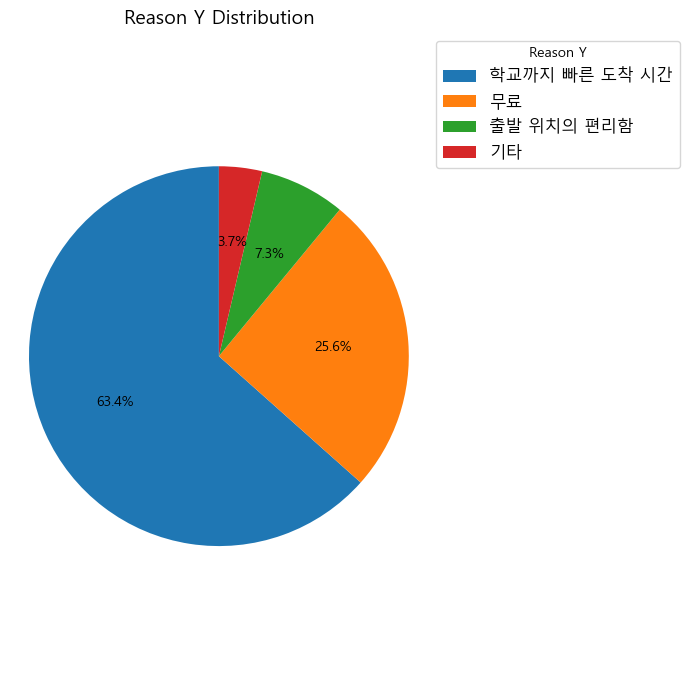

In [22]:
# Reason_Y 카테고리화 함수
def categorize_reason_y(reason):
    if reason in ['학교까지 빠른 도착 시간', '무료', '출발 위치의 편리함']:
        return reason
    else:
        return '기타'

# Reason_Y의 값 변환
df_yes['Reason_Y'] = df_yes['Reason_Y'].apply(categorize_reason_y)

# Reason_Y의 비율 계산
reason_counts = df_yes['Reason_Y'].value_counts(normalize=True) * 100

# 원그래프 그리기
plt.figure(figsize=(7, 7))
# 퍼센트를 표시하되, 레이블은 None으로 설정
plt.pie(
    reason_counts,
    autopct=lambda p: f'{p:.1f}%' if p > 0 else '',  # 퍼센트 표시
    startangle=90,
    colors=plt.cm.tab10.colors  # 기본 색상 팔레트 사용
)

# 범례 추가 (그래프 외부에 배치)
plt.legend(reason_counts.index, title='Reason Y', loc='upper left', bbox_to_anchor=(1, 1), fontsize=12)

plt.title('Reason Y Distribution', fontsize=14)
plt.axis('equal')  # 원형 유지
plt.tight_layout()  # 레이아웃 조정
plt.show()

<br>

## 셔틀버스를 일주일에 몇 일 이용하는가?(서울O vs 서울 X)

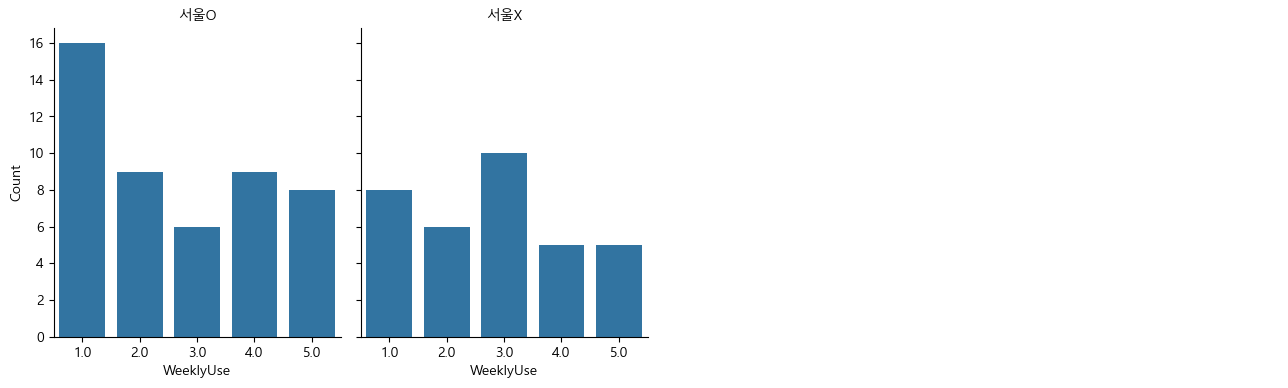

In [24]:
import seaborn as sns

# Seaborn의 catplot을 이용한 FacetGrid 그래프
g = sns.catplot(
    data=df_yes1,
    x="WeeklyUse", 
    kind="count", 
    col="City/Province", 
    col_wrap=4,  # 한 줄에 표시할 그래프 수
    height=4, 
    aspect=0.8
)

g.set_titles("{col_name}")
g.set_axis_labels("WeeklyUse", "Count")
plt.show()

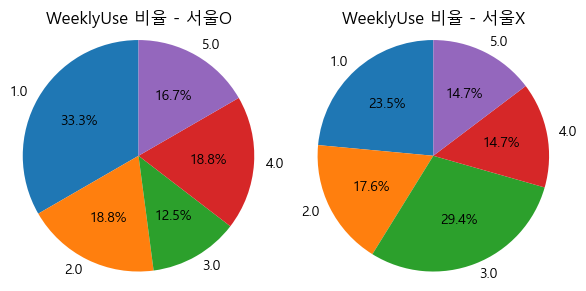

In [25]:
# 'City/Province'로 그룹화하고 'WeeklyUse' 값의 비율을 계산
city_groups = df_yes1.groupby('City/Province')['WeeklyUse'].value_counts(normalize=True).unstack()

# 한 번에 두 개의 그래프를 가로로 나란히 배치
fig, axes = plt.subplots(1, 2, figsize=(6, 3))  # 1행 2열의 서브플롯 생성

# 첫 번째 그래프
city_1 = city_groups.index[0]
axes[0].pie(city_groups.loc[city_1], labels=city_groups.columns, autopct='%1.1f%%', startangle=90)
axes[0].set_title(f'WeeklyUse 비율 - {city_1}')
axes[0].axis('equal')

# 두 번째 그래프
city_2 = city_groups.index[1]
axes[1].pie(city_groups.loc[city_2], labels=city_groups.columns, autopct='%1.1f%%', startangle=90)
axes[1].set_title(f'WeeklyUse 비율 - {city_2}')
axes[1].axis('equal')

plt.tight_layout()  # 그래프 간격 조정
plt.show()

<br>

## 셔틀버스를 일주일에 몇 일 이용하는가?(서울 구별로)

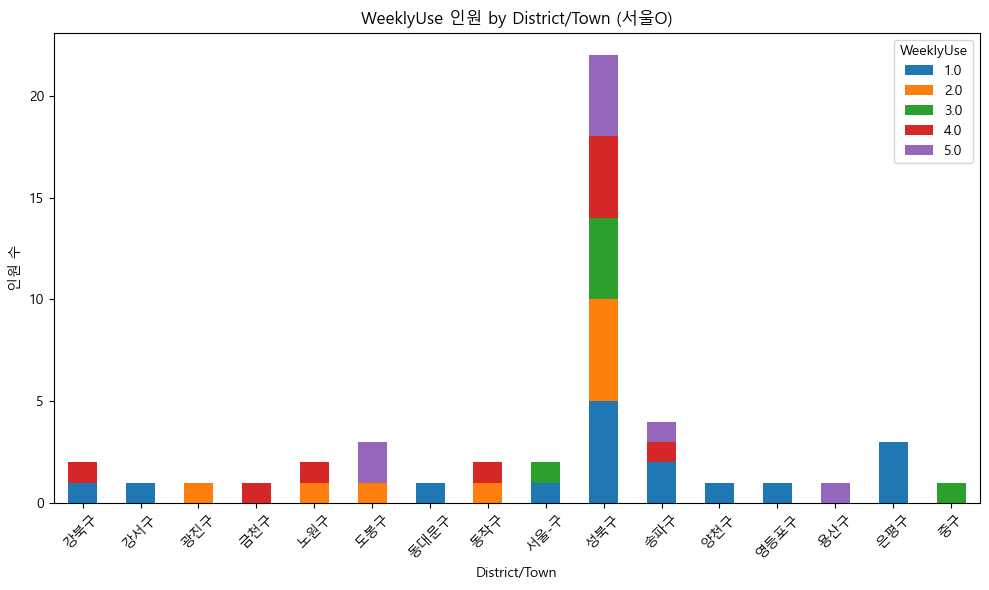

In [27]:
# 'City/Province'가 '서울O'인 데이터만 필터링
df_seoul = df_yes2[df_yes2['City/Province'] == '서울O']

# 'District/Town'별로 'WeeklyUse' 카운트 계산
district_groups = df_seoul.groupby('District/Town')['WeeklyUse'].value_counts().unstack()

# 그래프 그리기
district_groups.plot(kind='bar', stacked=True, figsize=(10, 6))

plt.title("WeeklyUse 인원 by District/Town (서울O)")
plt.xlabel("District/Town")
plt.ylabel("인원 수")
plt.legend(title='WeeklyUse')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

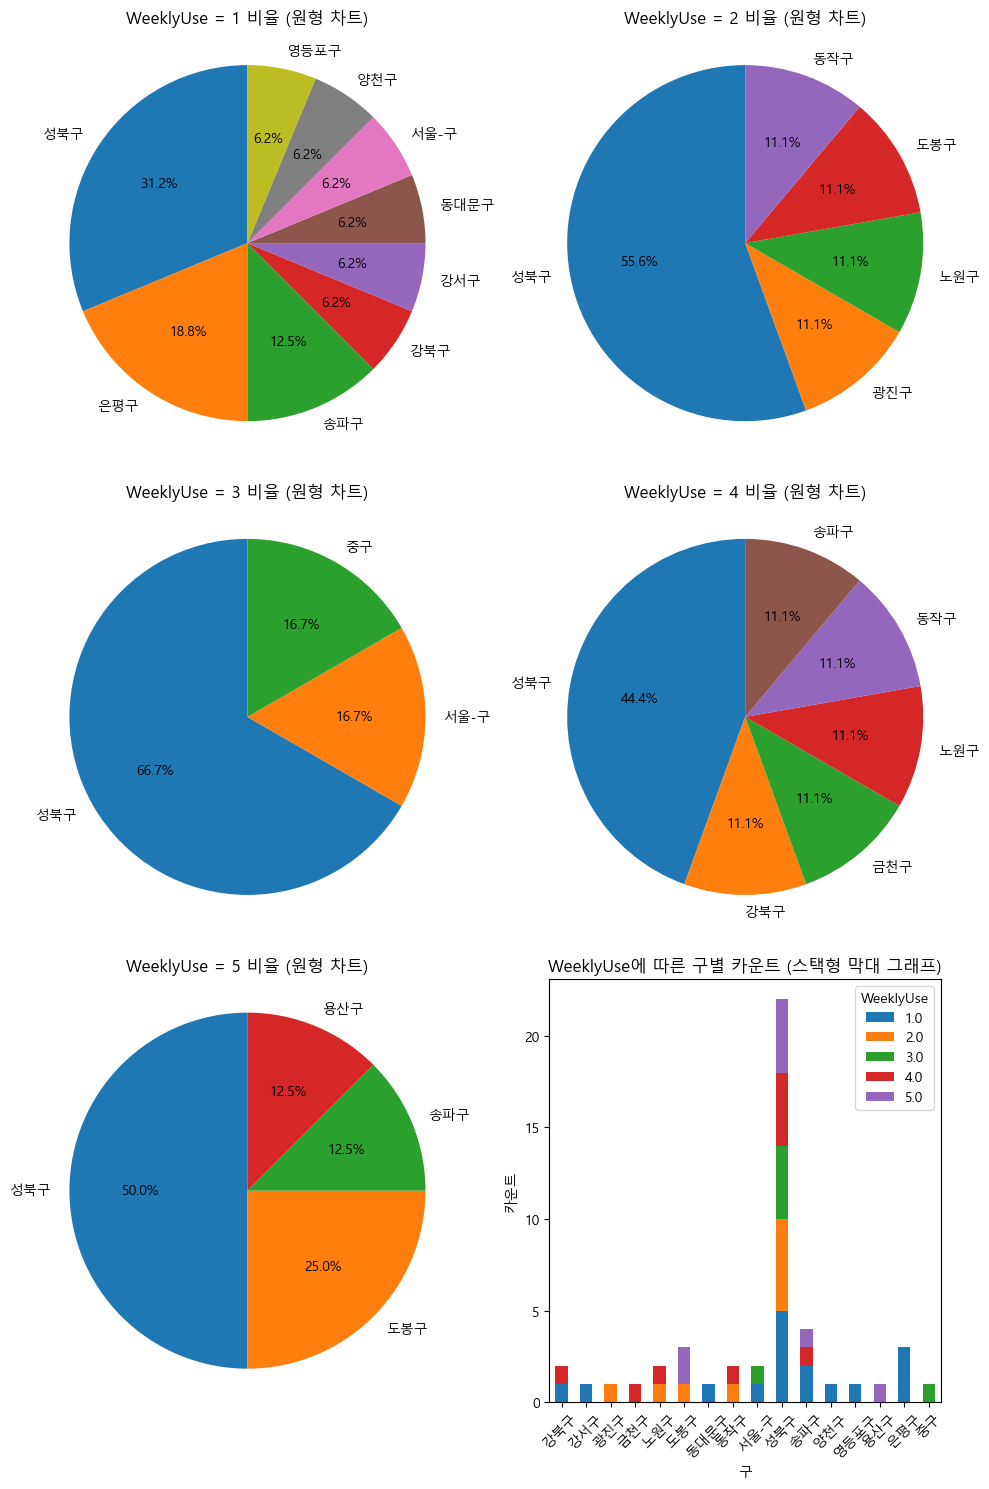

In [28]:
# 'City/Province'가 '서울O'인 데이터만 필터링
df_seoul = df_yes2[df_yes2['City/Province'] == '서울O']

# WeeklyUse 값 필터링 (1, 2, 3, 4, 5)
weekly_use_values = [1, 2, 3, 4, 5]
filtered_data = df_seoul[df_seoul['WeeklyUse'].isin(weekly_use_values)]

# 서브플롯 설정
fig, axes = plt.subplots(3, 2, figsize=(10, 15))
axes = axes.flatten()  # 2D 배열을 1D 배열로 변환

for i, use in enumerate(weekly_use_values):
    district_counts = filtered_data[filtered_data['WeeklyUse'] == use]['District/Town'].value_counts()

    # 원형 차트
    axes[i].pie(district_counts, labels=district_counts.index, autopct='%1.1f%%', startangle=90)
    axes[i].set_title(f'WeeklyUse = {use} 비율 (원형 차트)')
    axes[i].axis('equal')  # 원형 유지

# 스택형 막대 그래프 (세 번째 서브플롯)
stacked_counts = filtered_data.groupby(['District/Town', 'WeeklyUse']).size().unstack(fill_value=0)

# 6번째 서브플롯에 스택형 막대 그래프 그리기
stacked_counts.plot(kind='bar', stacked=True, ax=axes[5])
axes[5].set_title('WeeklyUse에 따른 구별 카운트 (스택형 막대 그래프)')
axes[5].set_xlabel('구')
axes[5].set_ylabel('카운트')
axes[5].tick_params(axis='x', rotation=45)

# 서브플롯 간격 조정
plt.tight_layout()
plt.show()

<br>

## 현재 이용하는 셔틀버스 탑승 위치(지하철역)

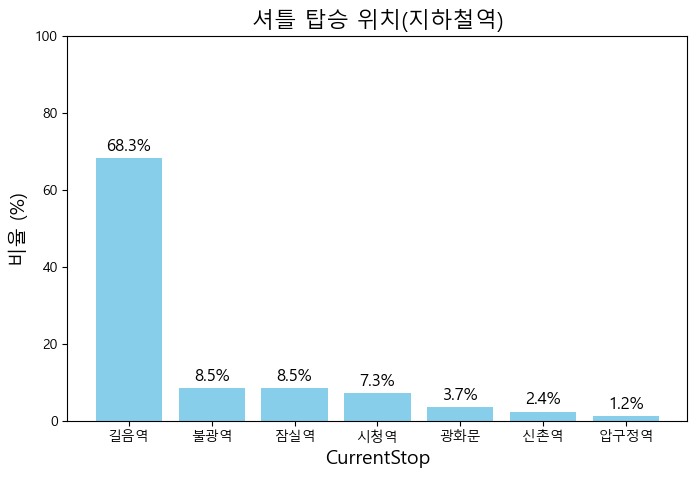

In [30]:
import matplotlib.pyplot as plt

# 'CurrentStop' 열의 응답 카운트
current_stop_counts = df_yes['CurrentStop'].value_counts()

# 비율 계산
current_stop_percentage = current_stop_counts / current_stop_counts.sum() * 100

# 막대그래프 시각화
plt.figure(figsize=(8, 5))
plt.bar(current_stop_percentage.index, current_stop_percentage, color='skyblue')

# 그래프 제목 및 축 레이블 설정
plt.title('셔틀 탑승 위치(지하철역)', fontsize=16)
plt.xlabel('CurrentStop', fontsize=14)
plt.ylabel('비율 (%)', fontsize=14)

# y축 범위 설정
plt.ylim(0, 100)

# 비율을 바 위에 표시
for i, v in enumerate(current_stop_percentage):
    plt.text(i, v + 2, f'{v:.1f}%', ha='center', fontsize=12)

plt.show()


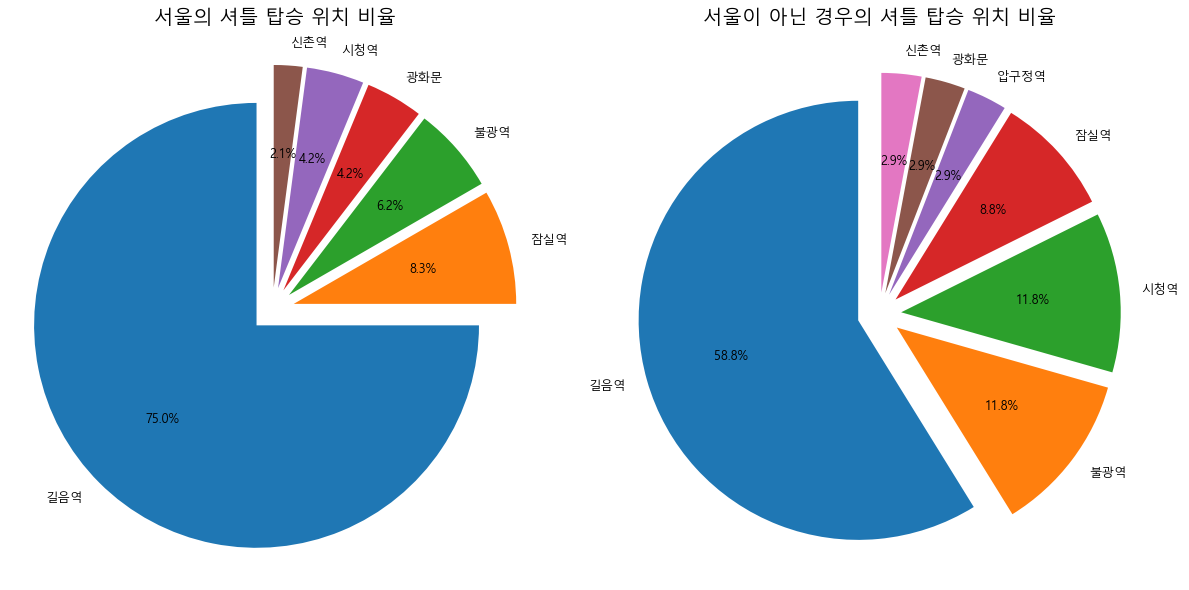

In [31]:

# 'City/Province'가 서울O와 서울X로 구분
df_seoul = df_yes2[df_yes2['City/Province'] == '서울O']
df_non_seoul = df_yes2[df_yes2['City/Province'] != '서울O']

# 지하철역별 셔틀 탑승 위치 비율 계산
seoul_counts = df_seoul['CurrentStop'].value_counts(normalize=True)
non_seoul_counts = df_non_seoul['CurrentStop'].value_counts(normalize=True)

# 데이터프레임으로 변환
comparison_df = pd.DataFrame({'서울': seoul_counts, '서울X': non_seoul_counts}).fillna(0)

# 서브플롯 설정
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# 원형 차트 (서울)
axes[0].pie(seoul_counts, labels=seoul_counts.index, autopct='%1.1f%%', startangle=90, explode=[0.1]*len(seoul_counts))
axes[0].set_title('서울의 셔틀 탑승 위치 비율', fontsize=14)
axes[0].axis('equal')  # 원형 유지

# 원형 차트 (서울이 아닌 경우)
axes[1].pie(non_seoul_counts, labels=non_seoul_counts.index, autopct='%1.1f%%', startangle=90, explode=[0.1]*len(non_seoul_counts))
axes[1].set_title('서울이 아닌 경우의 셔틀 탑승 위치 비율', fontsize=14)
axes[1].axis('equal')  # 원형 유지

# 레이블 폰트 크기 조정
for ax in axes:
    for text in ax.texts:
        text.set_fontsize(9)  # 레이블 폰트 크기 조정

# 서브플롯 간격 조정
plt.subplots_adjust(wspace=0.4)  # 서브플롯 간격 조정
plt.tight_layout()  # 레이아웃 조정
plt.show()

#### 서울은 길음역에서 탑승하는 인원 비율이 압도적으로 높고, 서울이 아닌 경우에는 불광역과 시청역의 비율이 높은 것을 확인할 수 있음.<br> 물론, 길음역도 많은 비율을 차지함.

<br>

## 셔틀버스 이용 만족도

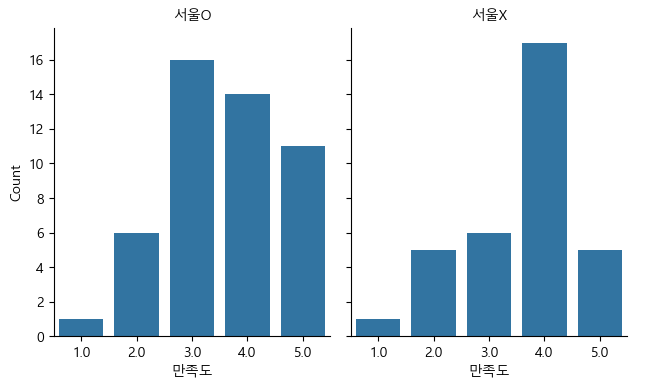

In [34]:
# Seaborn의 catplot을 이용한 FacetGrid 그래프
g = sns.catplot(
    data=df_yes2,
    x="Satisfaction",  # 만족도 열 이름을 사용
    kind="count", 
    col="City/Province", 
    col_wrap=2,  # 한 줄에 표시할 그래프 수
    height=4, 
    aspect=0.8
)

g.set_titles("{col_name}")  # 각 subplot의 제목 설정
g.set_axis_labels("만족도", "Count")  # x축 및 y축 레이블 설정
plt.show()

#### 일단 각각의 별점이 현재 이용중인 지하철 역별로 어떻게 다른지를 확인해볼까??

C:\Users\yura1\AppData\Local\Temp\ipykernel_592\11385742.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=mean_satisfaction, x='CurrentStop', y='Satisfaction', palette='viridis')


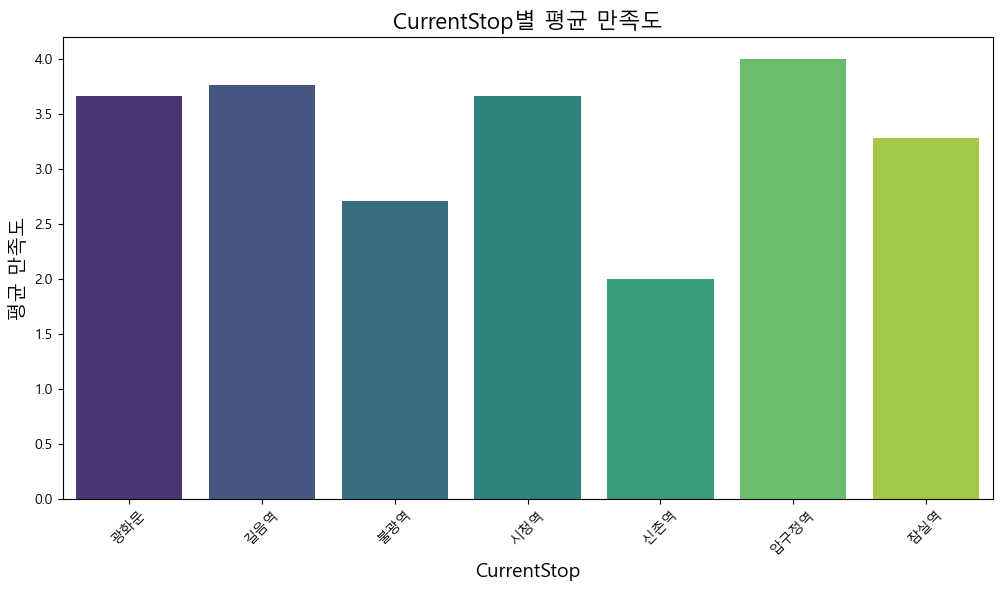

In [36]:
# CurrentStop별로 만족도의 평균 계산
mean_satisfaction = df_yes.groupby('CurrentStop')['Satisfaction'].mean().reset_index()

# 평균 만족도를 시각화
plt.figure(figsize=(12, 6))
sns.barplot(data=mean_satisfaction, x='CurrentStop', y='Satisfaction', palette='viridis')

# 그래프 제목 및 레이블 설정
plt.title('CurrentStop별 평균 만족도', fontsize=16)
plt.xlabel('CurrentStop', fontsize=14)
plt.ylabel('평균 만족도', fontsize=14)

# x축 레이블 회전
plt.xticks(rotation=45)

# 그래프 표시
plt.show()

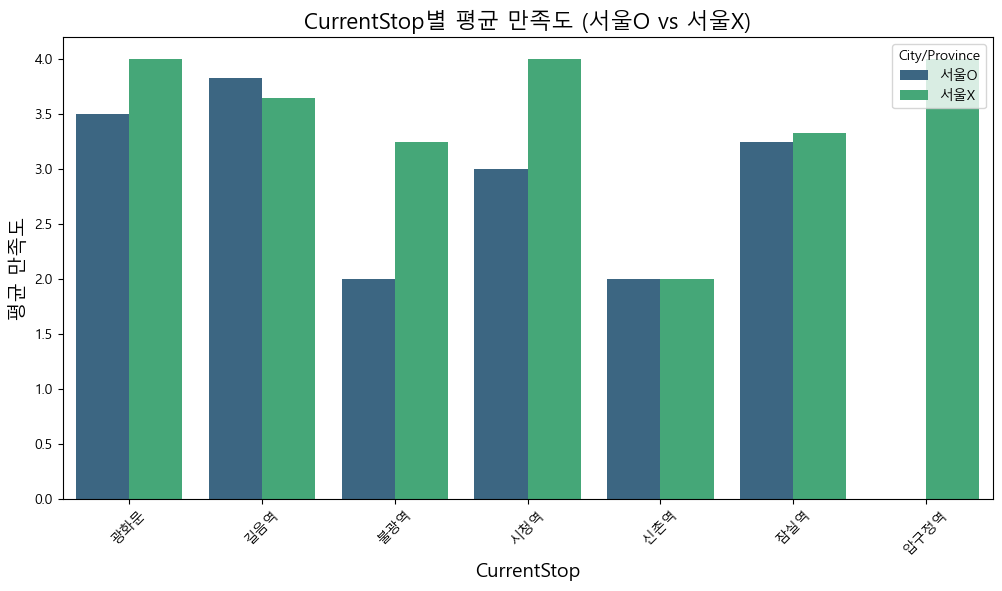

In [37]:
# 'City/Province'로 데이터 필터링
df_seoul = df_yes2[df_yes2['City/Province'] == '서울O']
df_non_seoul = df_yes2[df_yes2['City/Province'] != '서울O']

# CurrentStop별 평균 만족도 계산
mean_satisfaction_seoul = df_seoul.groupby('CurrentStop')['Satisfaction'].mean().reset_index()
mean_satisfaction_non_seoul = df_non_seoul.groupby('CurrentStop')['Satisfaction'].mean().reset_index()

# 평균 만족도 데이터 병합
mean_satisfaction_seoul['City/Province'] = '서울O'
mean_satisfaction_non_seoul['City/Province'] = '서울X'
combined_mean_satisfaction = pd.concat([mean_satisfaction_seoul, mean_satisfaction_non_seoul])

# 시각화
plt.figure(figsize=(12, 6))
sns.barplot(data=combined_mean_satisfaction, x='CurrentStop', y='Satisfaction', hue='City/Province', palette='viridis')

# 그래프 제목 및 레이블 설정
plt.title('CurrentStop별 평균 만족도 (서울O vs 서울X)', fontsize=16)
plt.xlabel('CurrentStop', fontsize=14)
plt.ylabel('평균 만족도', fontsize=14)

# x축 레이블 회전
plt.xticks(rotation=45)

# 그래프 표시
plt.legend(title='City/Province')
plt.show()

#### 이렇게 보니까 서울은 불광역과 시청역이 유독 만족도가 낮고, 신촌역은 대체적으로 만족도가 낮은 편이넹!!

#### **셔틀버스 경험자의 불만 사항을 봐보자~~!!**

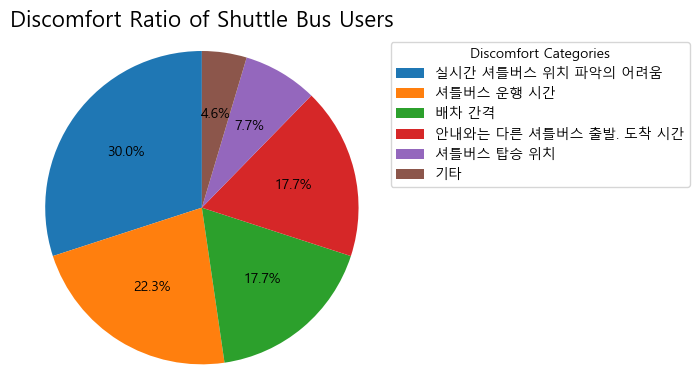

In [40]:
# NaN 값이 있는 행 제거
df_experience_cleaned = df_yes2.dropna(subset=['Discomfort'])

# Discomfort 값을 "기타"로 변환할 기준 설정
discomfort_categories = [
    "안내와는 다른 셔틀버스 출발. 도착 시간", 
    "실시간 셔틀버스 위치 파악의 어려움", 
    "배차 간격", 
    "셔틀버스 탑승 위치", 
    "셔틀버스 운행 시간"
]

# Discomfort의 값을 "기타"로 변경하고, 각 값을 나누기
def categorize_discomfort(row):
    discomfort_values = row.split(', ') if isinstance(row, str) else []
    categorized_values = [value if value in discomfort_categories else '기타' for value in discomfort_values]
    return categorized_values

df_experience_cleaned['Discomfort'] = df_experience_cleaned['Discomfort'].apply(categorize_discomfort)

# Discomfort 개수 계산
discomfort_exploded = df_experience_cleaned.explode('Discomfort')
discomfort_counts = discomfort_exploded['Discomfort'].value_counts()

# 비율 계산
discomfort_ratios = (discomfort_counts / discomfort_counts.sum()) * 100

# 원그래프 생성
plt.figure(figsize=(7, 4))
wedges, texts, autotexts = plt.pie(
    discomfort_ratios, 
    autopct=lambda p: f'{p:.1f}%' if p > 0 else '',  # 비율이 0.0%일 경우 표시하지 않음
    startangle=90,
    labeldistance=1.2  # 라벨을 원 그래프의 바깥쪽에 위치시킴
)

# 범례 추가
plt.legend(wedges, discomfort_ratios.index, title="Discomfort Categories", loc="upper left", bbox_to_anchor=(1, 1))

plt.title('Discomfort Ratio of Shuttle Bus Users', fontsize=16)
plt.axis('equal')  # 원형 유지
plt.tight_layout()
plt.show()

#### **역별로 불만 사항을 봐보자~~!! - 셔틀버스 경험자 전체**

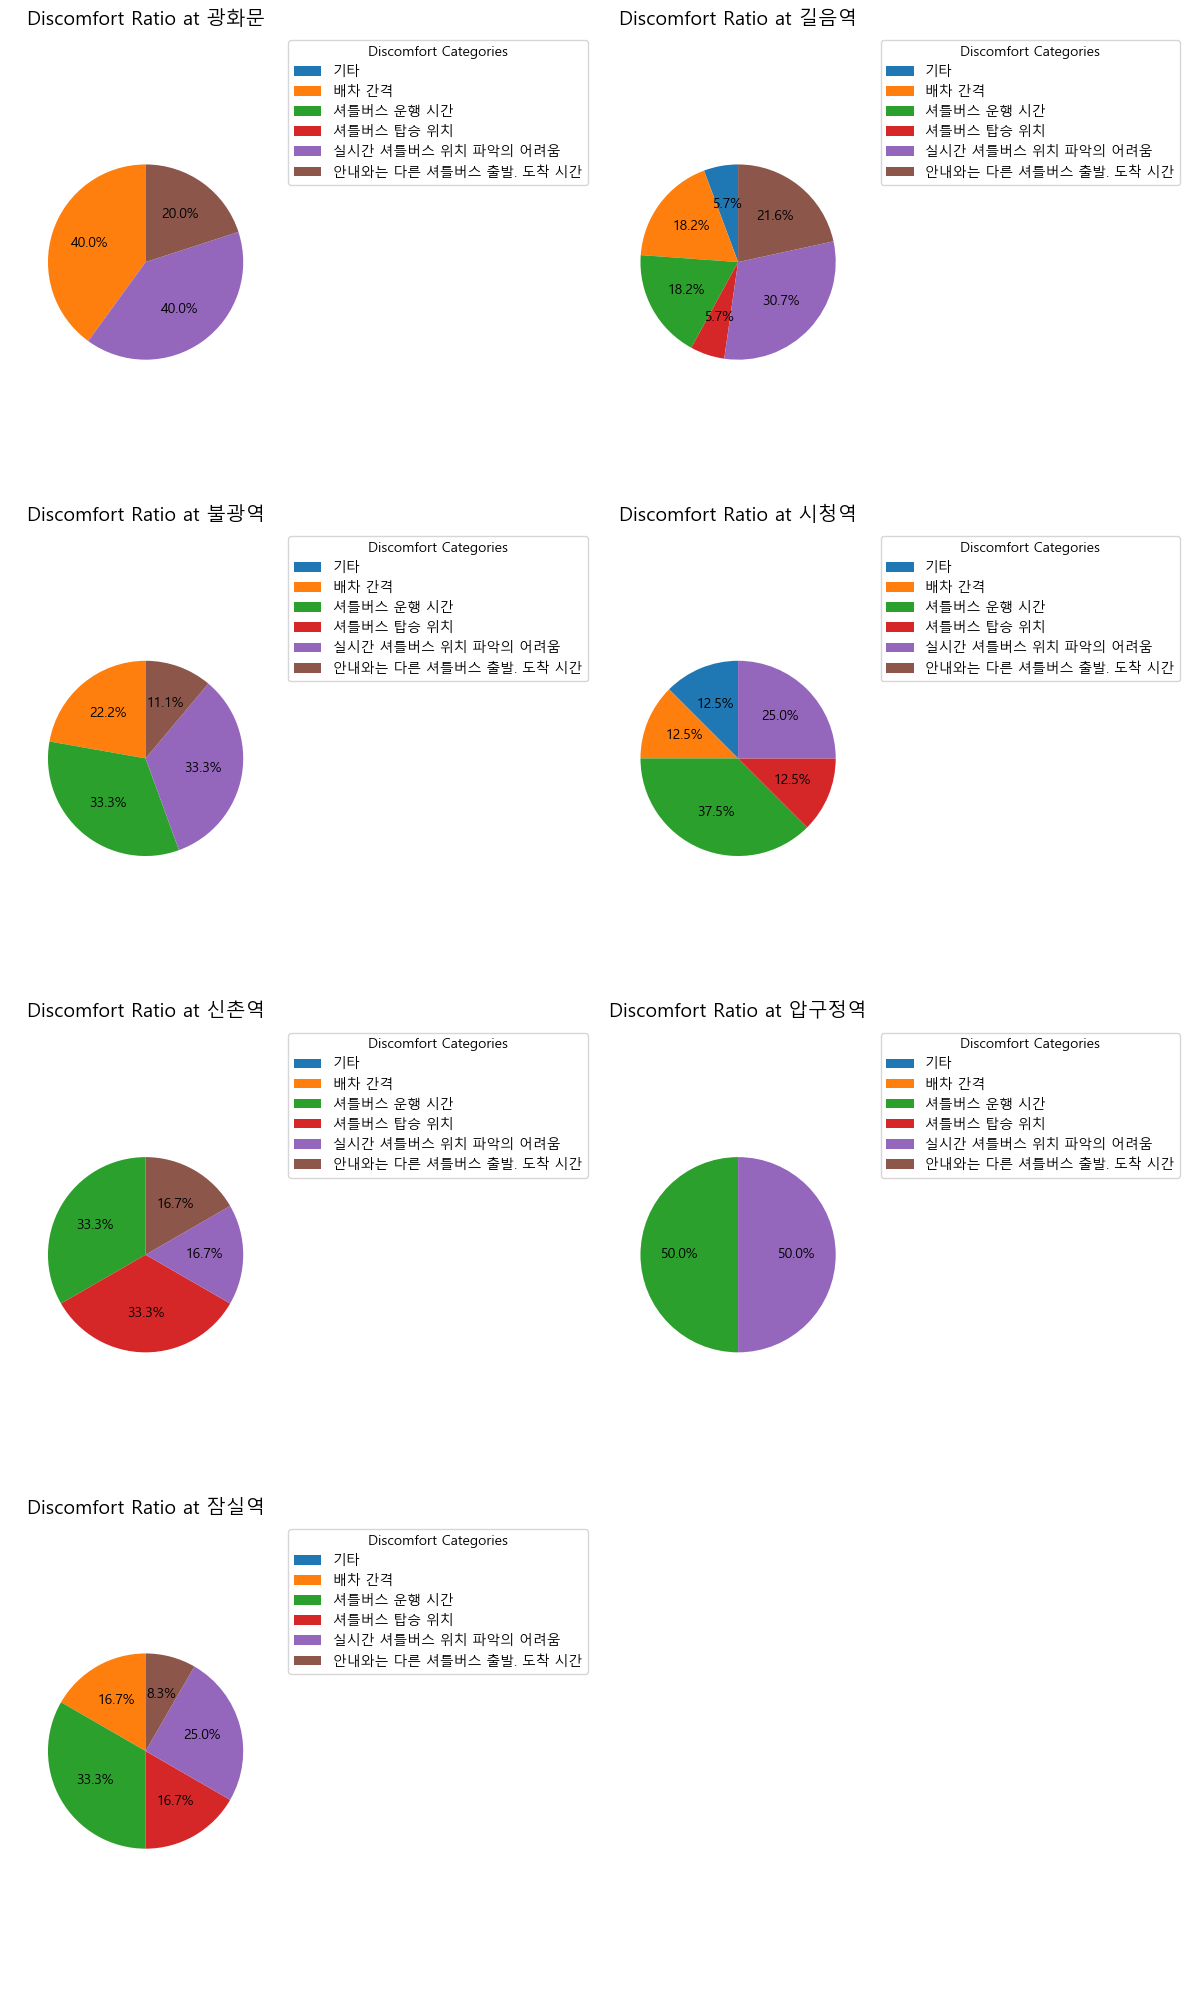

In [42]:
# NaN 값이 있는 행 제거
df_yes2_cleaned = df_yes2.dropna(subset=['Discomfort'])

# Discomfort 값을 "기타"로 변환할 기준 설정
discomfort_categories = [
    "안내와는 다른 셔틀버스 출발. 도착 시간", 
    "실시간 셔틀버스 위치 파악의 어려움", 
    "배차 간격", 
    "셔틀버스 탑승 위치", 
    "셔틀버스 운행 시간"
]

# Discomfort의 값을 "기타"로 변경하고, 각 값을 나누기
def categorize_discomfort(row):
    discomfort_values = row.split(', ') if isinstance(row, str) else []
    categorized_values = [value if value in discomfort_categories else '기타' for value in discomfort_values]
    return categorized_values

df_yes2_cleaned['Discomfort'] = df_yes2_cleaned['Discomfort'].apply(categorize_discomfort)

# CurrentStop별 Discomfort 개수 계산
discomfort_exploded = df_yes2_cleaned.explode('Discomfort')
discomfort_counts = discomfort_exploded.groupby(['CurrentStop', 'Discomfort']).size().unstack(fill_value=0)

# 비율 계산
discomfort_ratios = (discomfort_counts.div(discomfort_counts.sum(axis=1), axis=0) * 100).fillna(0)

# CurrentStop의 개수
num_stops = len(discomfort_ratios)

# 서브플롯 생성 (2개씩 3줄)
fig, axes = plt.subplots(nrows=(num_stops + 1) // 2, ncols=2, figsize=(12, 5 * ((num_stops + 1) // 2)))
axes = axes.flatten()  # 2D 배열을 1D로 변환

# 0.0%인 경우 표시하지 않도록 하는 함수
def func(p):
    return f'{p:.1f}%' if p > 0 else ''

# 모든 역의 원그래프
for i, current_stop in enumerate(discomfort_ratios.index):
    wedges, texts, autotexts = axes[i].pie(
        discomfort_ratios.loc[current_stop], 
        autopct=lambda p: func(p),  # 비율이 0.0%일 경우 표시하지 않음
        startangle=90,
        labeldistance=1.2,  # 라벨을 원 그래프의 바깥쪽에 위치시킴
        radius=0.75  # 원의 크기 조정
    )
    
    # 범례 추가
    axes[i].legend(wedges, discomfort_ratios.columns, title="Discomfort Categories", loc="upper left", bbox_to_anchor=(1, 1))

    axes[i].set_title(f'Discomfort Ratio at {current_stop}', fontsize=14)
    axes[i].axis('equal')  # 원형 유지

# 남은 서브플롯 비우기
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# 레이아웃 조정 및 그래프 표시
plt.tight_layout()
plt.show()

#### 신촌역은 다른 역들에 비해 셔틀버스 탑승 위치에 대한 불만이 많네?!!!

#### **역별로 불만 사항을 봐보자~~!! - 셔틀버스 경험자 중 서울O 거주지인 사람 대상**

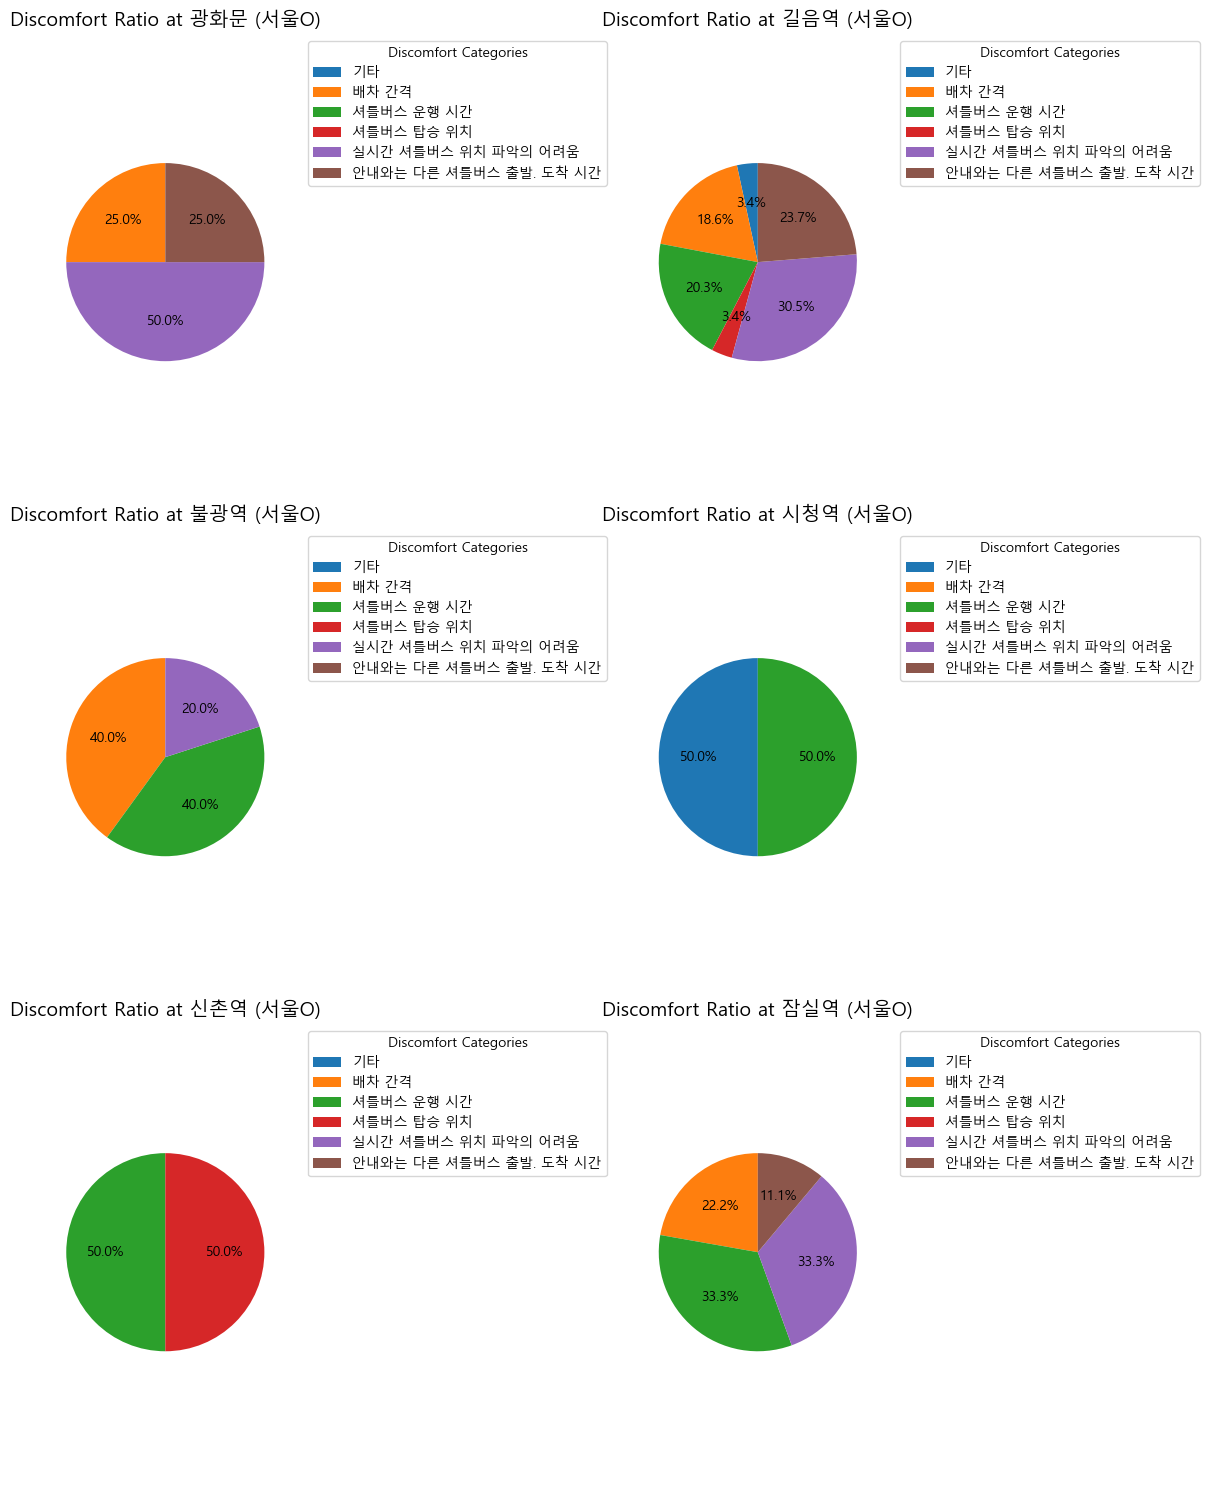

In [45]:
# 서울O 데이터 필터링
df_seoul_o = df_yes2[df_yes2['City/Province'] == '서울O']

# NaN 값이 있는 행 제거
df_seoul_o = df_seoul_o.dropna(subset=['Discomfort'])

# Discomfort 값을 "기타"로 변환할 기준 설정
discomfort_categories = [
    "안내와는 다른 셔틀버스 출발. 도착 시간", 
    "실시간 셔틀버스 위치 파악의 어려움", 
    "배차 간격", 
    "셔틀버스 탑승 위치", 
    "셔틀버스 운행 시간"
]

# Discomfort의 값을 "기타"로 변경하고, 각 값을 나누기
def categorize_discomfort(row):
    discomfort_values = row.split(', ') if isinstance(row, str) else []
    categorized_values = [value if value in discomfort_categories else '기타' for value in discomfort_values]
    return categorized_values

df_seoul_o['Discomfort'] = df_seoul_o['Discomfort'].apply(categorize_discomfort)

# CurrentStop별 Discomfort 개수 계산
discomfort_exploded_o = df_seoul_o.explode('Discomfort')
discomfort_counts_o = discomfort_exploded_o.groupby(['CurrentStop', 'Discomfort']).size().unstack(fill_value=0)

# 비율 계산
discomfort_ratios_o = (discomfort_counts_o.div(discomfort_counts_o.sum(axis=1), axis=0) * 100).fillna(0)

# CurrentStop의 개수
num_stops_o = len(discomfort_ratios_o)

# 서브플롯 생성 (2개씩 3줄)
fig, axes = plt.subplots(nrows=(num_stops_o + 1) // 2, ncols=2, figsize=(12, 5 * ((num_stops_o + 1) // 2)))
axes = axes.flatten()  # 2D 배열을 1D로 변환

# 0.0%인 경우 표시하지 않도록 하는 함수
def func(p):
    return f'{p:.1f}%' if p > 0 else ''

# 서울O의 원그래프
for i, current_stop in enumerate(discomfort_ratios_o.index):
    wedges, texts, autotexts = axes[i].pie(
        discomfort_ratios_o.loc[current_stop], 
        autopct=lambda p: func(p),  # 비율이 0.0%일 경우 표시하지 않음
        startangle=90,
        labeldistance=1.2,  # 라벨을 원 그래프의 바깥쪽에 위치시킴
        radius=0.75  # 원의 크기 조정
    )
    
    # 범례 추가
    axes[i].legend(wedges, discomfort_ratios_o.columns, title="Discomfort Categories", loc="upper left", bbox_to_anchor=(1, 1))

    axes[i].set_title(f'Discomfort Ratio at {current_stop} (서울O)', fontsize=14)
    axes[i].axis('equal')  # 원형 유지

# 남은 서브플롯 비우기
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# 레이아웃 조정 및 그래프 표시
plt.tight_layout()
plt.show()

#### 서울 거주지인 사람들이 유독 서울 거주지가 아닌 사람들에 비해 불광역과 시청역의 만족도가 낮음
####  -> 불광역은 배차견격의 만족도, 시청역은 기타의 만족도에서 서울O 사람들의 불만이 더 큰 것으로 확인됨.
####  -> 데이터의 수가 워낙 적어서 원인을 더 파악하기 어렵다는 게 한계임.

#### **역별로 불만 사항을 봐보자~~!! - 셔틀버스 경험자 중 서울X 거주자인 사람 대상**

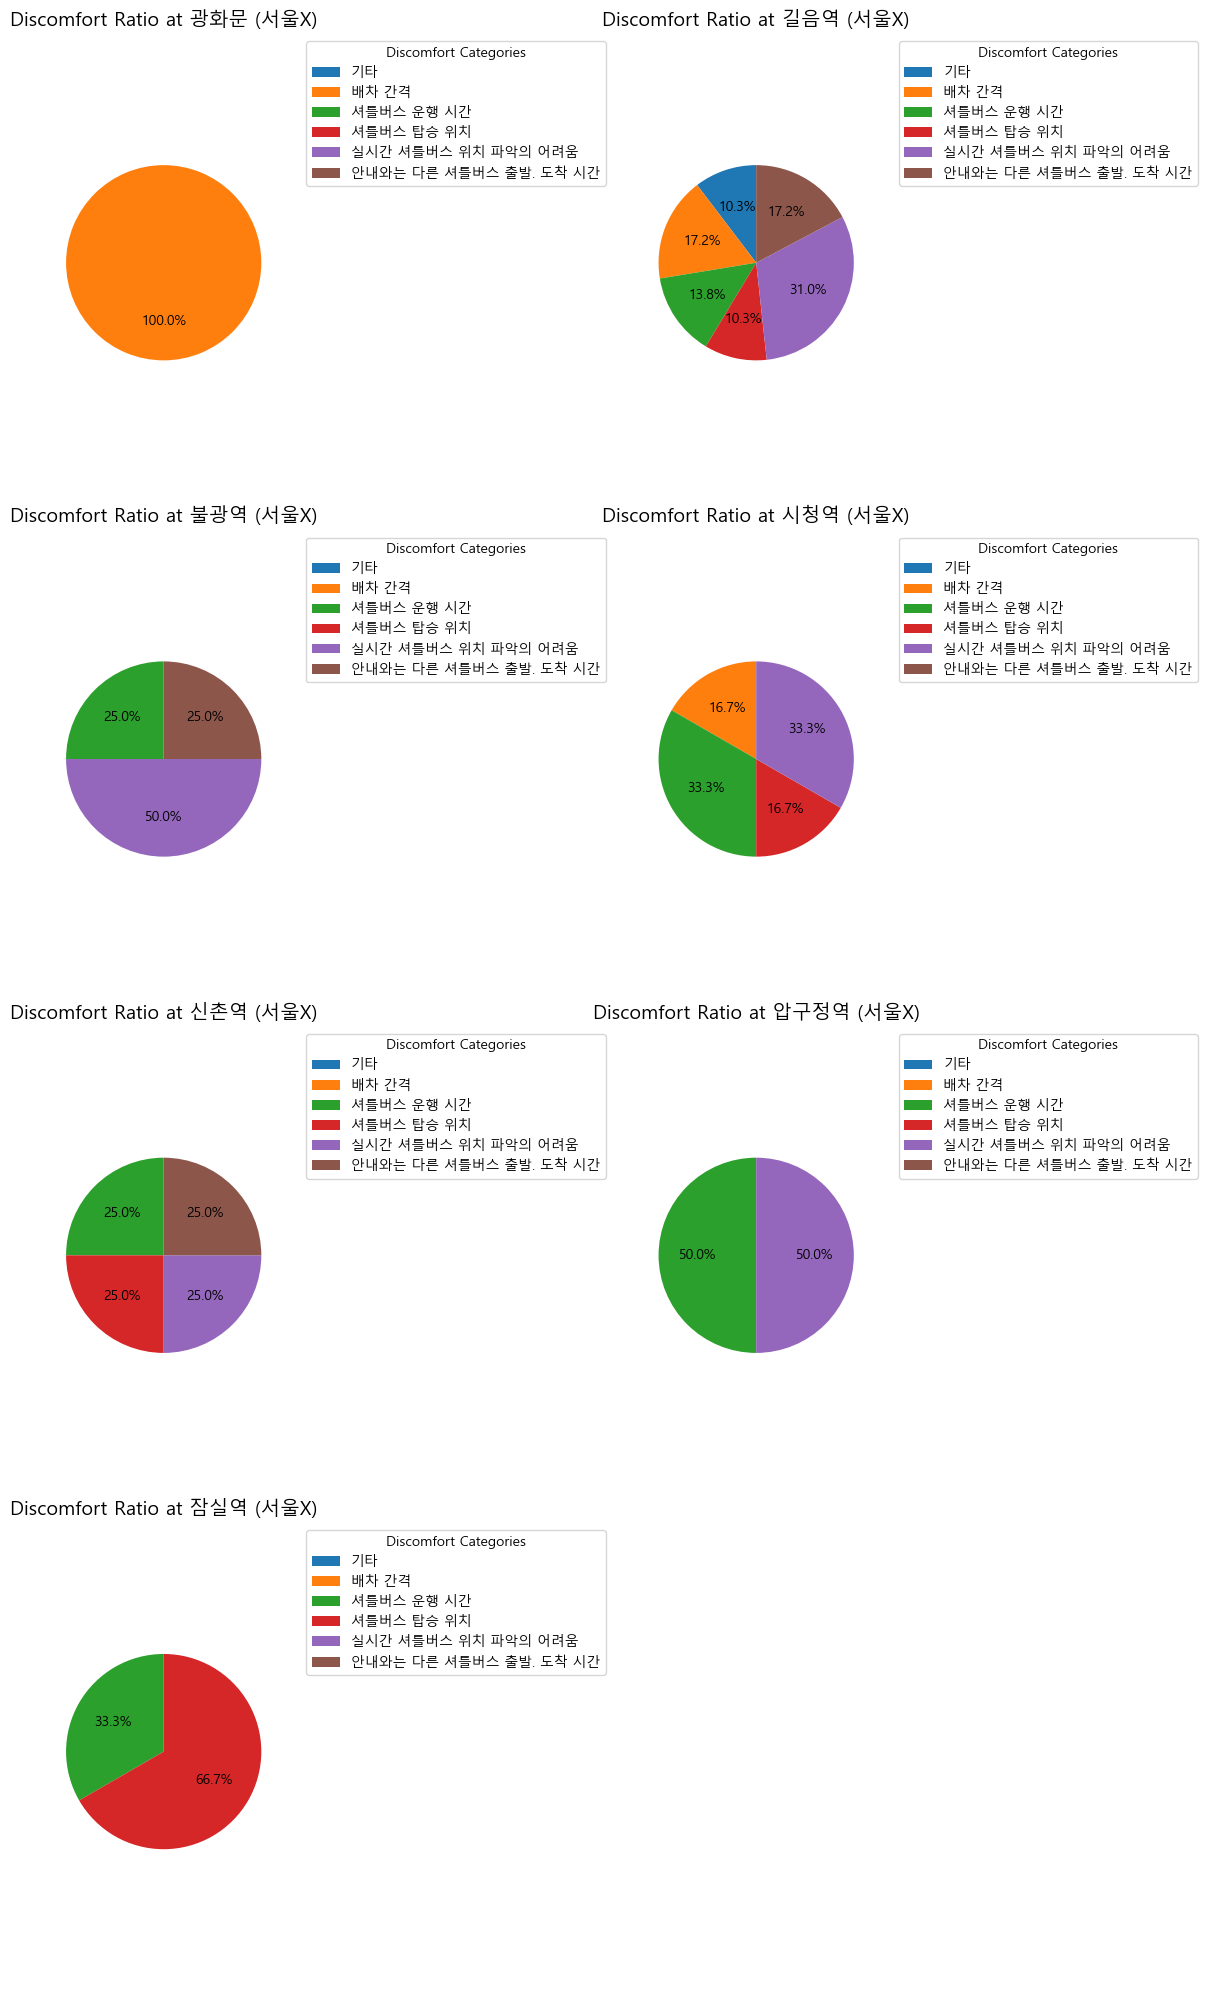

In [48]:
# 서울X 데이터 필터링
df_seoul_x = df_yes2[df_yes2['City/Province'] == '서울X']

# NaN 값이 있는 행 제거
df_seoul_x = df_seoul_x.dropna(subset=['Discomfort'])

# Discomfort의 값을 "기타"로 변환
df_seoul_x['Discomfort'] = df_seoul_x['Discomfort'].apply(categorize_discomfort)

# CurrentStop별 Discomfort 개수 계산
discomfort_exploded_x = df_seoul_x.explode('Discomfort')
discomfort_counts_x = discomfort_exploded_x.groupby(['CurrentStop', 'Discomfort']).size().unstack(fill_value=0)

# 비율 계산
discomfort_ratios_x = (discomfort_counts_x.div(discomfort_counts_x.sum(axis=1), axis=0) * 100).fillna(0)

# CurrentStop의 개수
num_stops_x = len(discomfort_ratios_x)

# 서브플롯 생성 (2개씩 3줄)
fig, axes = plt.subplots(nrows=(num_stops_x + 1) // 2, ncols=2, figsize=(12, 5 * ((num_stops_x + 1) // 2)))
axes = axes.flatten()  # 2D 배열을 1D로 변환

# 서울X의 원그래프
for i, current_stop in enumerate(discomfort_ratios_x.index):
    wedges, texts, autotexts = axes[i].pie(
        discomfort_ratios_x.loc[current_stop], 
        autopct=lambda p: func(p),  # 비율이 0.0%일 경우 표시하지 않음
        startangle=90,
        labeldistance=1.2,  # 라벨을 원 그래프의 바깥쪽에 위치시킴
        radius=0.75  # 원의 크기 조정
    )
    
    # 범례 추가
    axes[i].legend(wedges, discomfort_ratios_x.columns, title="Discomfort Categories", loc="upper left", bbox_to_anchor=(1, 1))

    axes[i].set_title(f'Discomfort Ratio at {current_stop} (서울X)', fontsize=14)
    axes[i].axis('equal')  # 원형 유지

# 남은 서브플롯 비우기
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# 레이아웃 조정 및 그래프 표시
plt.tight_layout()
plt.show()

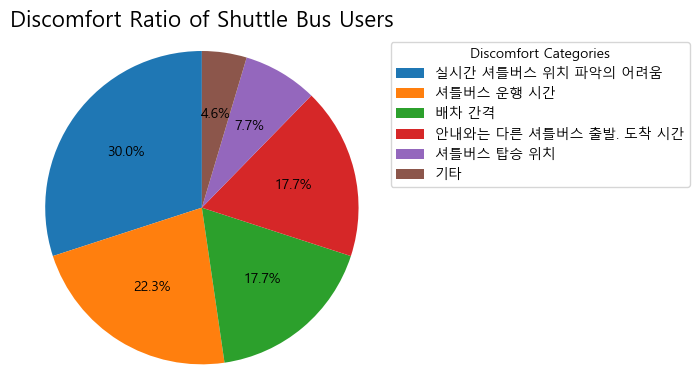

In [49]:
# NaN 값이 있는 행 제거
df_experience_cleaned = df_yes2.dropna(subset=['Discomfort'])

# Discomfort 값을 "기타"로 변환할 기준 설정
discomfort_categories = [
    "안내와는 다른 셔틀버스 출발. 도착 시간", 
    "실시간 셔틀버스 위치 파악의 어려움", 
    "배차 간격", 
    "셔틀버스 탑승 위치", 
    "셔틀버스 운행 시간"
]

# Discomfort의 값을 "기타"로 변경하고, 각 값을 나누기
def categorize_discomfort(row):
    discomfort_values = row.split(', ') if isinstance(row, str) else []
    categorized_values = [value if value in discomfort_categories else '기타' for value in discomfort_values]
    return categorized_values

df_experience_cleaned['Discomfort'] = df_experience_cleaned['Discomfort'].apply(categorize_discomfort)

# Discomfort 개수 계산
discomfort_exploded = df_experience_cleaned.explode('Discomfort')
discomfort_counts = discomfort_exploded['Discomfort'].value_counts()

# 비율 계산
discomfort_ratios = (discomfort_counts / discomfort_counts.sum()) * 100

# 원그래프 생성
plt.figure(figsize=(7, 4))
wedges, texts, autotexts = plt.pie(
    discomfort_ratios, 
    autopct=lambda p: f'{p:.1f}%' if p > 0 else '',  # 비율이 0.0%일 경우 표시하지 않음
    startangle=90,
    labeldistance=1.2  # 라벨을 원 그래프의 바깥쪽에 위치시킴
)

# 범례 추가
plt.legend(wedges, discomfort_ratios.index, title="Discomfort Categories", loc="upper left", bbox_to_anchor=(1, 1))

plt.title('Discomfort Ratio of Shuttle Bus Users', fontsize=16)
plt.axis('equal')  # 원형 유지
plt.tight_layout()
plt.show()

#### 일단 다시 위의 그래프를 봐보면, 사람들이 셔틀버스 위치 파악의 어려움을 가장 많이 겪는 것으로 확인됨. 
#### 실시간 셔틀버스 위치 파악의 어려움과 안내와는 다른 셔틀버스 출발. 도착 시간은 앱으로 어느정도 커버가 될 것 같음.
#### 셔틀버스 운행 시간과 배차 간격은 셔틀 버스 운행에 대한 문제로 셔틀버스 추가 운영이 대안이 될 수 있음.
#### 셔틀버스 미경험자의 불만은??

<br>


# **셔틀버스 미경험자**

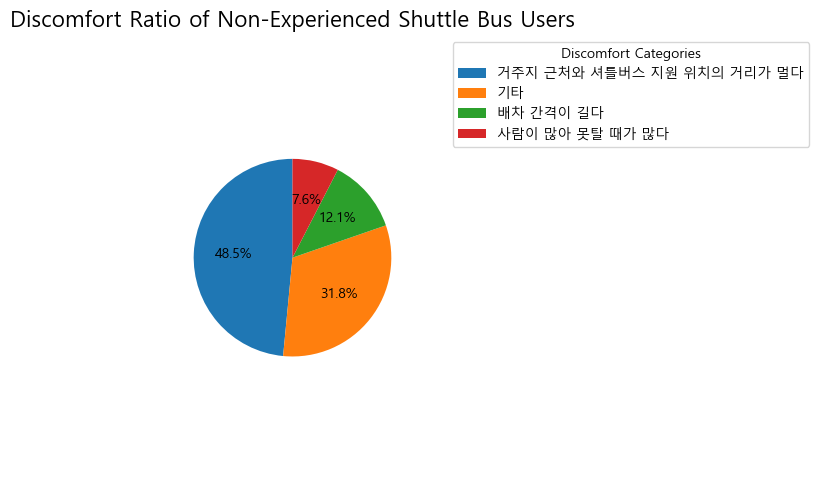

In [52]:
# df_no에서 NaN 값이 있는 행 제거
df_no_cleaned = df_no.dropna(subset=['Reason_N'])

# Discomfort 값을 "기타"로 변환할 기준 설정
discomfort_categories = [
    "배차 간격이 길다", 
    "거주지 근처와 셔틀버스 지원 위치의 거리가 멀다", 
    "셔틀버스의 출도착 시작이 예상과 다를 때가 많다", 
    "사람이 많아 못탈 때가 많다"
]

# Discomfort의 값을 "기타"로 변경하고, 각 값을 나누기
def categorize_discomfort(row):
    discomfort_values = row.split(', ') if isinstance(row, str) else []
    categorized_values = [value if value in discomfort_categories else '기타' for value in discomfort_values]
    return categorized_values

df_no_cleaned['Reason_N'] = df_no_cleaned['Reason_N'].apply(categorize_discomfort)

# Discomfort 개수 계산
discomfort_exploded_no = df_no_cleaned.explode('Reason_N')
discomfort_counts_no = discomfort_exploded_no['Reason_N'].value_counts()

# 비율 계산
discomfort_ratios_no = (discomfort_counts_no / discomfort_counts_no.sum()) * 100

# 원그래프 생성
plt.figure(figsize=(7, 5))
wedges, texts, autotexts = plt.pie(
    discomfort_ratios_no, 
    autopct=lambda p: f'{p:.1f}%' if p > 0 else '',  # 비율이 0.0%일 경우 표시하지 않음
    startangle=90,
    labeldistance=1.2  # 라벨을 원 그래프의 바깥쪽에 위치시킴
)

# 범례 추가
plt.legend(wedges, discomfort_ratios_no.index, title="Discomfort Categories", loc="upper left", bbox_to_anchor=(1, 1))

plt.title('Discomfort Ratio of Non-Experienced Shuttle Bus Users', fontsize=16)
plt.axis('equal')  # 원형 유지
plt.tight_layout()
plt.show()

#### 셔틀버스 경험자의 경우에는 셔틀버스 탑승 위치에 대한 불만이 적은 편이지만, 셔틀버스 미경험자의 경우에는 셔틀버스 탑승 위치가 셔틀버스를 이용하지 않는 가장 큰 원인임. 
#### 그래서 셔틀버스 미경험자와 셔틀버스 미경험자의 거주지의 관계를 시각화해보자~~

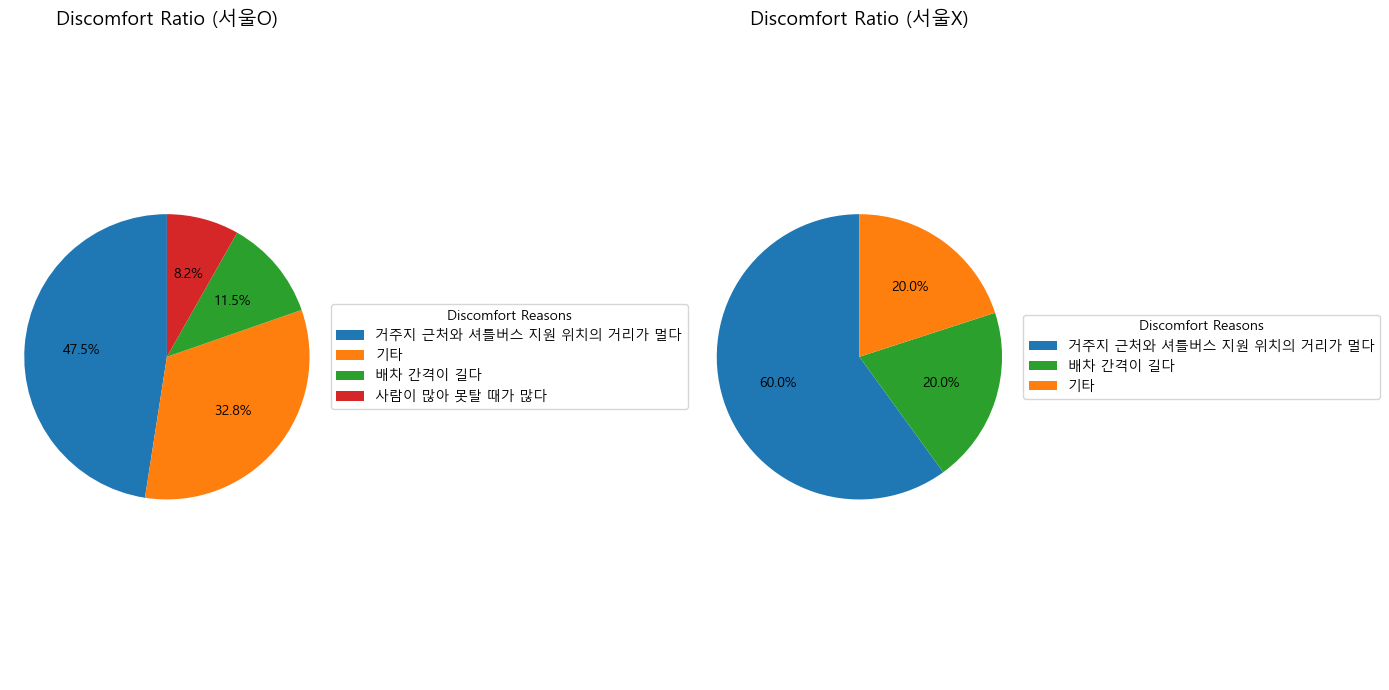

In [54]:
# Discomfort 카테고리화
df_no['Reason_N'] = df_no['Reason_N'].apply(categorize_discomfort)

# 서울O와 서울X 데이터 필터링
df_seoulO = df_no[df_no['City/Province'] == '서울O']
df_seoulX = df_no[df_no['City/Province'] == '서울X']

# 전체 Discomfort 카운트
def plot_discomfort_distribution(df, title, ax, colors=None):
    discomfort_exploded = df.explode('Reason_N')
    discomfort_counts = discomfort_exploded['Reason_N'].value_counts(normalize=True) * 100
    
    wedges, _, _ = ax.pie(
        discomfort_counts,
        labels=None,  # 레이블 제거
        autopct=lambda p: f'{p:.1f}%' if p > 0 else '',
        startangle=90,
        colors=colors  # 색상 추가
    )
    
    ax.set_title(title, fontsize=14)
    ax.axis('equal')  # 원형 유지
    
    # 범례 추가
    ax.legend(wedges, discomfort_counts.index, title="Discomfort Reasons", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

# 서브플롯 생성
fig, axes = plt.subplots(1, 2, figsize=(14, 7))  # 2개 나란히 배치

# 서울O Discomfort 비율
plot_discomfort_distribution(df_seoulO, 'Discomfort Ratio (서울O)', axes[0])

# 색상 설정 (서울X에서 '기타'와 '배차 간격이 길다'의 색상 변경)
colors_X = ['#4caf50', '#ff9800', '#2196f3', '#f44336', '#9c27b0', '#e91e63']  # 예시 색상
# 예를 들어, '배차 간격이 길다'를 초록색으로, '기타'를 주황색으로 설정
colors_X[2] = '#ff7f0e'
colors_X[1] = '#2ca02c'
colors_X[0] = '#1f77b4'

# 서울X Discomfort 비율
plot_discomfort_distribution(df_seoulX, 'Discomfort Ratio (서울X)', axes[1], colors=colors_X)

# 레이아웃 조정 및 그래프 표시
plt.tight_layout()
plt.show()

#### 배차 간격과 셔틀버스 탑승 위치에 대한 불만은 서울X인 지역에서 더 크게 나타남.

C:\Users\yura1\AppData\Local\Temp\ipykernel_592\2081240709.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_seoulO['Reason_N'] = df_seoulO['Reason_N'].apply(categorize_discomfort)


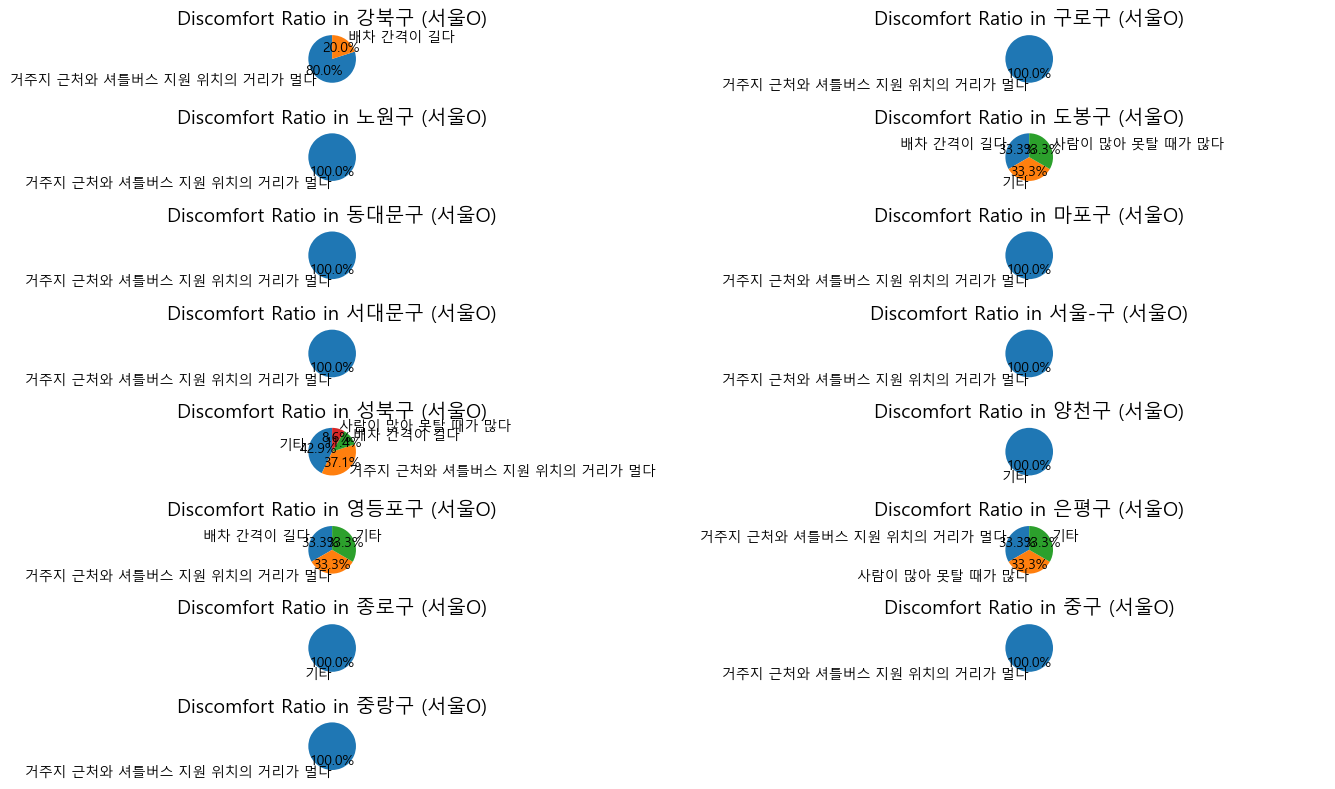

In [56]:
# 서울O 데이터 필터링
df_seoulO = df_no2[df_no2['City/Province'] == '서울O']

# 서울O의 Discomfort 카테고리화
df_seoulO['Reason_N'] = df_seoulO['Reason_N'].apply(categorize_discomfort)

# 서브플롯 생성
num_districts = df_seoulO['District/Town'].nunique()
fig, axes = plt.subplots(nrows=(num_districts + 1) // 2, ncols=2, figsize=(14, 8))  # 2개씩 나열
axes = axes.flatten()  # 2D 배열을 1D로 변환

# 서울O의 구별 불만 비율 계산 및 시각화
for i, (district, group) in enumerate(df_seoulO.groupby('District/Town')):
    discomfort_exploded = group.explode('Reason_N')
    discomfort_counts = discomfort_exploded['Reason_N'].value_counts(normalize=True) * 100
    
    axes[i].pie(
        discomfort_counts,
        labels=discomfort_counts.index,
        autopct=lambda p: f'{p:.1f}%' if p > 0 else '',
        startangle=90
    )
    axes[i].set_title(f'Discomfort Ratio in {district} (서울O)', fontsize=14)
    axes[i].axis('equal')  # 원형 유지

# 남은 서브플롯 비우기
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# 레이아웃 조정 및 그래프 표시
plt.tight_layout()
plt.show()

C:\Users\yura1\AppData\Local\Temp\ipykernel_592\4017116546.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_seoulX['Reason_N'] = df_seoulX['Reason_N'].apply(categorize_discomfort)


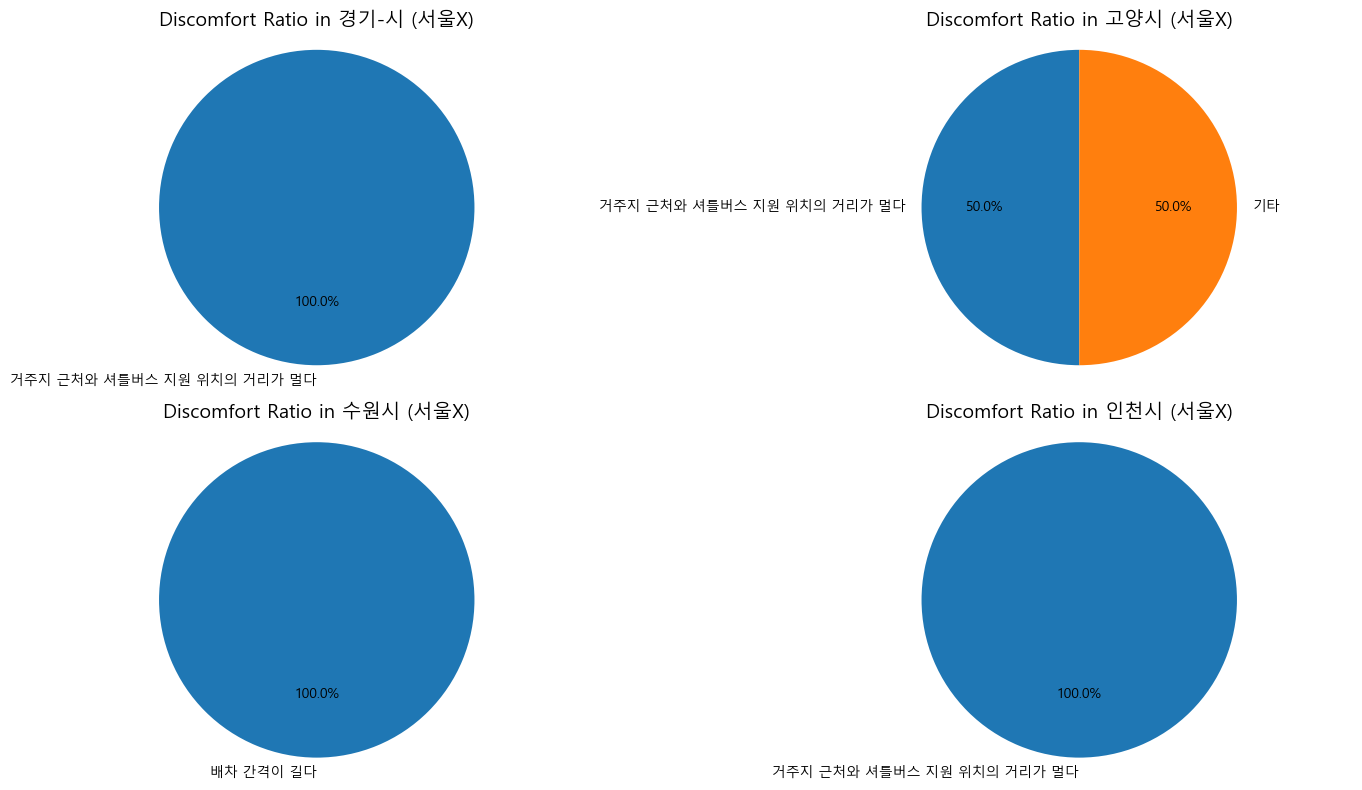

In [57]:
# 서울X 데이터 필터링
df_seoulX = df_no2[df_no2['City/Province'] == '서울X']

# Discomfort 카테고리화
df_seoulX['Reason_N'] = df_seoulX['Reason_N'].apply(categorize_discomfort)

# 서브플롯 생성
num_districts = df_seoulX['District/Town'].nunique()
fig, axes = plt.subplots(nrows=(num_districts + 1) // 2, ncols=2, figsize=(14, 8))  # 2개씩 나열
axes = axes.flatten()  # 2D 배열을 1D로 변환

# 서울X의 구별 불만 비율 계산 및 시각화
for i, (district, group) in enumerate(df_seoulX.groupby('District/Town')):
    discomfort_exploded = group.explode('Reason_N')
    discomfort_counts = discomfort_exploded['Reason_N'].value_counts(normalize=True) * 100
    
    axes[i].pie(
        discomfort_counts,
        labels=discomfort_counts.index,
        autopct=lambda p: f'{p:.1f}%' if p > 0 else '',
        startangle=90
    )
    axes[i].set_title(f'Discomfort Ratio in {district} (서울X)', fontsize=14)
    axes[i].axis('equal')  # 원형 유지

# 남은 서브플롯 비우기
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# 레이아웃 조정 및 그래프 표시
plt.tight_layout()
plt.show()

#### 셔틀버스 미경험자는 셔틀버스 탑승 위치에 대한 불만이 큼.
#### 그럼 이제 원하는 셔틀버스 탑승 위치가 무엇인지 확인해보자~~!!

In [59]:
# DesiredStop의 빈도 수 계산
stop_counts = df_no['DesiredStop'].value_counts()

# 개수가 1개인 경우 "기타"로 변경
df_no['DesiredStop'] = df_no['DesiredStop'].apply(lambda x: '기타' if stop_counts[x] == 1 else x)

# 이름 통일
df_no['DesiredStop'] = df_no['DesiredStop'].replace({'보국문역': '북한산 보국문역'})

# 결과 확인
print(df_no['DesiredStop'].value_counts())

DesiredStop
없음          23
기타          21
북한산 보국문역     6
정릉역          2
불광역          2
성신여대입구역      2
Name: count, dtype: int64


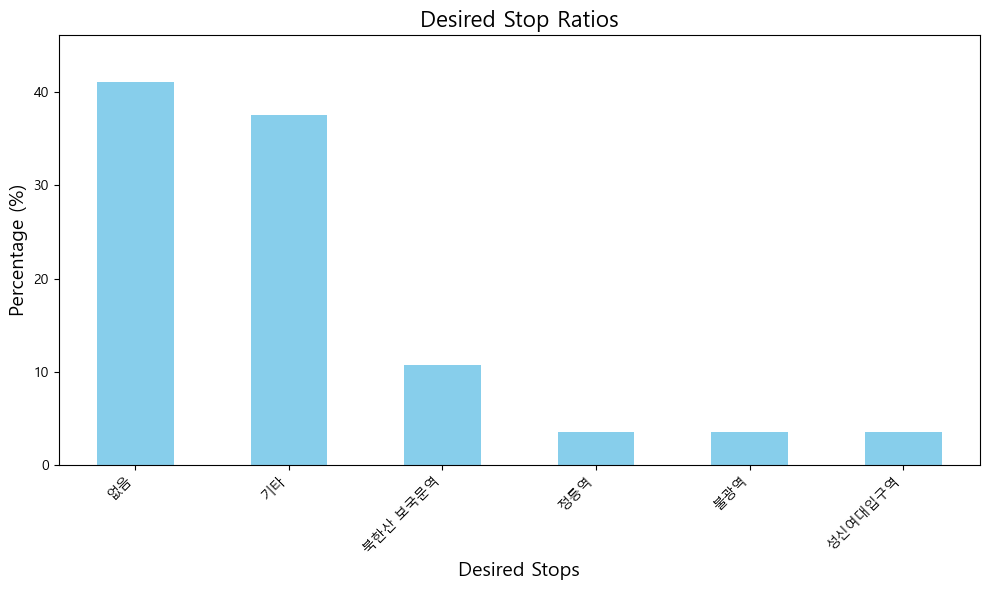

In [60]:
# DesiredStop 비율 계산
stop_ratios = df_no['DesiredStop'].value_counts(normalize=True) * 100

# 막대그래프 생성
plt.figure(figsize=(10, 6))
stop_ratios.plot(kind='bar', color='skyblue')
plt.title('Desired Stop Ratios', fontsize=16)
plt.xlabel('Desired Stops', fontsize=14)
plt.ylabel('Percentage (%)', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.ylim(0, stop_ratios.max() + 5)  # y축 범위 조정
plt.tight_layout()  # 레이아웃 조정
plt.show()

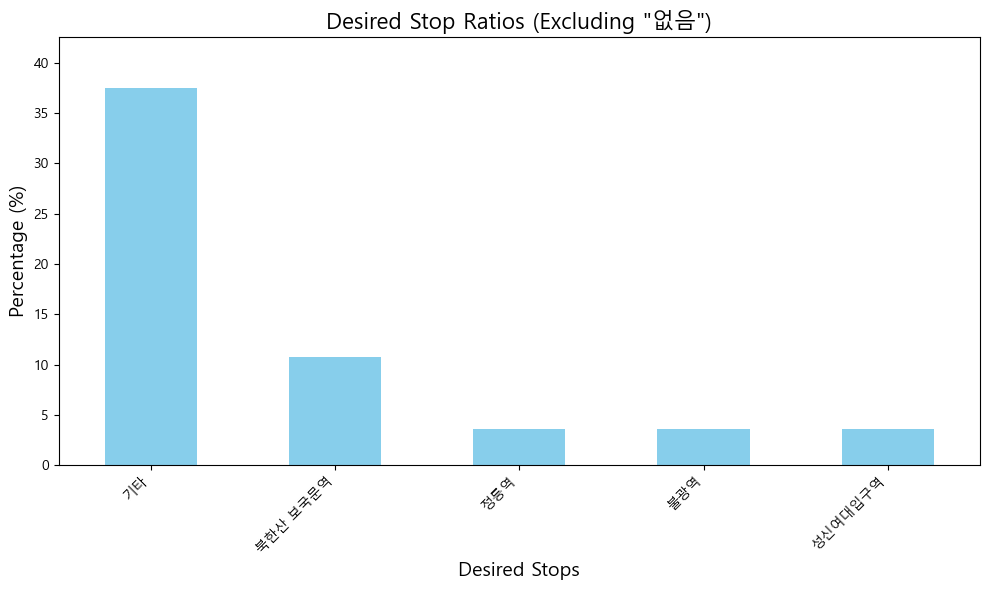

In [61]:
# DesiredStop 비율 계산 (없음 제외)
stop_ratios = df_no['DesiredStop'].value_counts(normalize=True) * 100
stop_ratios = stop_ratios[stop_ratios.index != '없음']  # '없음' 제외

# 막대그래프 생성
plt.figure(figsize=(10, 6))
stop_ratios.plot(kind='bar', color='skyblue')
plt.title('Desired Stop Ratios (Excluding "없음")', fontsize=16)
plt.xlabel('Desired Stops', fontsize=14)
plt.ylabel('Percentage (%)', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.ylim(0, stop_ratios.max() + 5)  # y축 범위 조정
plt.tight_layout()  # 레이아웃 조정
plt.show()

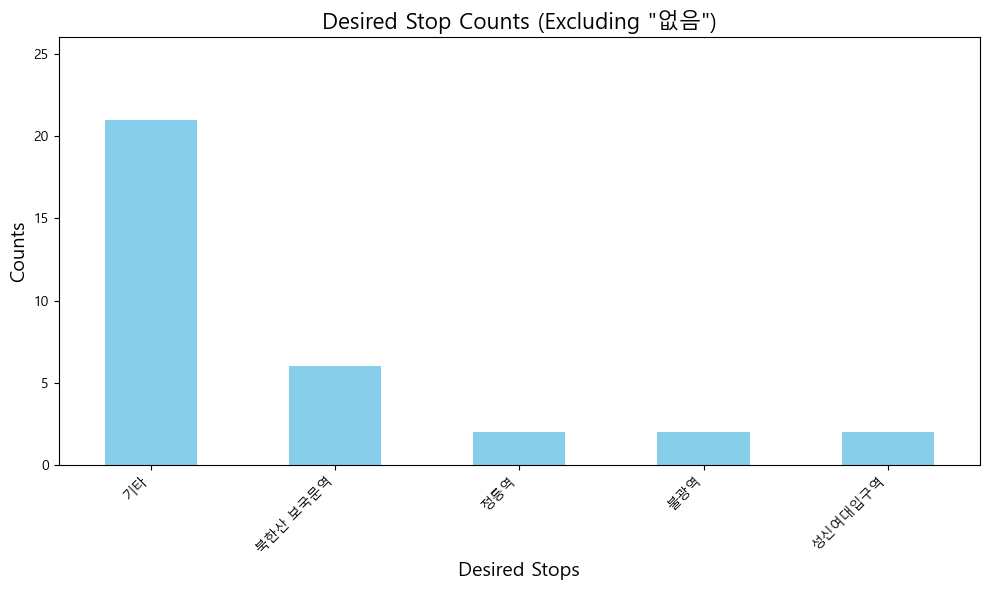

In [62]:
# DesiredStop 개수 계산 (없음 제외)
stop_counts = df_no['DesiredStop'].value_counts()
stop_counts = stop_counts[stop_counts.index != '없음']  # '없음' 제외

# 막대그래프 생성
plt.figure(figsize=(10, 6))
stop_counts.plot(kind='bar', color='skyblue')
plt.title('Desired Stop Counts (Excluding "없음")', fontsize=16)
plt.xlabel('Desired Stops', fontsize=14)
plt.ylabel('Counts', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.ylim(0, stop_counts.max() + 5)  # y축 범위 조정
plt.tight_layout()  # 레이아웃 조정
plt.show()

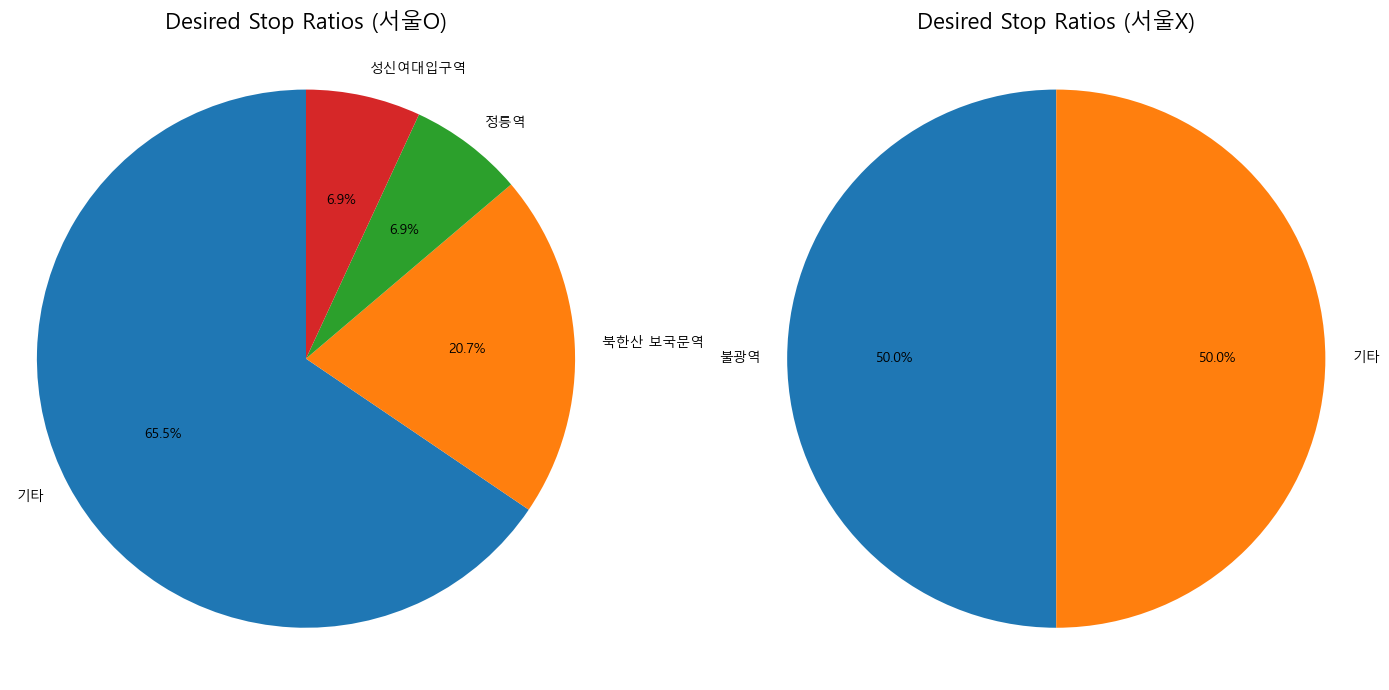

In [63]:
# 서울O와 서울X 데이터 필터링
df_seoulO = df_no[df_no['City/Province'] == '서울O']
df_seoulX = df_no[df_no['City/Province'] == '서울X']

# DesiredStop 비율 계산 (없음 제외)
stop_ratios_O = df_seoulO['DesiredStop'].value_counts(normalize=True).loc[lambda x: x.index != '없음'] * 100
stop_ratios_X = df_seoulX['DesiredStop'].value_counts(normalize=True).loc[lambda x: x.index != '없음'] * 100

# 서브플롯 생성
fig, axes = plt.subplots(1, 2, figsize=(14, 7))  # 2개 나란히 배치

# 서울O DesiredStop 비율 원그래프
axes[0].pie(
    stop_ratios_O,
    labels=stop_ratios_O.index,
    autopct='%1.1f%%',
    startangle=90
)
axes[0].set_title('Desired Stop Ratios (서울O)', fontsize=16)
axes[0].axis('equal')  # 원형 유지

# 서울X DesiredStop 비율 원그래프
axes[1].pie(
    stop_ratios_X,
    labels=stop_ratios_X.index,
    autopct='%1.1f%%',
    startangle=90
)
axes[1].set_title('Desired Stop Ratios (서울X)', fontsize=16)
axes[1].axis('equal')  # 원형 유지

# 레이아웃 조정 및 그래프 표시
plt.tight_layout()
plt.show()

#### 일단 서울O에서는 북한산 보국문역을, 서울X에서는 불광역이 가장 많이 셔틀버스 추가 운영 바라고 있음.
#### 두 역에 셔틀버스 추가 운영이 이루어진다면 셔틀버스 탑승 위치에 대한 불만은 감소할 것으로 추측됨.

### 이외의 아쉬운 점들도 보완되고 바라는 점이 보충되고 나면 셔틀버스 미경험자도 셔틀버스를 이용하고자 할까??

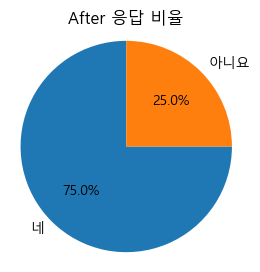

In [66]:
import matplotlib.pyplot as plt

# 'After' 열의 응답 카운트
after_counts = df_no['After'].value_counts()

# 원그래프 시각화
plt.figure(figsize=(3, 3))
plt.pie(after_counts, labels=after_counts.index, autopct='%1.1f%%', startangle=90)

plt.title('After 응답 비율')
plt.axis('equal')  # 원형으로 표시하기 위해 x와 y 비율을 동일하게 설정
plt.show()


### 75%나 이용할거라고 하네^^ ㅎㅅㅎ

<br>

### **Feedback**

#### 추가로 바라는 점을 확인해보기 위해서 Feedback도 확인해보자~~

In [70]:
# NaN 값이 있는 행 삭제
df_yes_clean = df_yes.dropna(subset=['Feedback'])
df_no_clean = df_no.dropna(subset=['Feedback'])

# 상위 5개 항목 추출
top_feedback_yes = df_yes_clean['Feedback'].head(5)
top_feedback_no = df_no_clean['Feedback'].head(5)

# 결과 출력
print("Feedback from df_yes:")
print(top_feedback_yes)

print("\nFeedback from df_no:")
print(top_feedback_no)

Feedback from df_yes:
9         더 많은곳에서 출발해주면 좋겠다. 너무 서울지역에만 국한되어 있는듯하다.
16    최근에 하교할 때 5분 일찍 출발하시던데 정시까지는 기다리셔야 하지 않나 싶네요
21                        실시간으로 버스 위치 알 수 있었으면 좋겠다
24                    시청역 셔틀버스 배차 간격이 더 짧았으면 좋겠습니다
31                                     더 자주 다녔으면!!
Name: Feedback, dtype: object

Feedback from df_no:
18                                배차간격이 조금 더 줄었으면 합니다.
25                                                   .
27                              너무 서울 위주인 게 문제일 거 같긴 함
29                                           더자주 해주세니요
30    오전 8시 ~ 10시까지 배차 좀 많이 늘려주세요.\n출퇴근 시간 겹쳐서 버스 못 타요
Name: Feedback, dtype: object


#### 불만사항과 바라는 점에서 본 내용 말고는 어떤 내용이 있는지 봐보자!!

In [72]:
# df_yes와 df_no에서 Feedback 열 추출
feedback_yes = df_yes[['Feedback']].dropna()
feedback_no = df_no[['Feedback']].dropna()

# 두 데이터프레임 합치기
feedback_combined = pd.concat([feedback_yes, feedback_no])

# 키워드 리스트 정의
keywords = ['배차', '시간', '자주', '실시간', '출발', '없', '많', '씨', '늘리기', '역', '파']

# 키워드를 포함하는 행 제거
feedback_filtered = feedback_combined[~feedback_combined['Feedback'].str.contains('|'.join(keywords), na=False)]

# 상위 5개 행 추출
top_feedback = feedback_filtered.head(10)

# 결과 출력
print(top_feedback)

                                              Feedback
42                                       미운영할꺼면사전에공지바람
65               경기도/인천에서 통학하는 학생들을 위한 노선을 만들어주었으면 합니다
68                                      제발 일산에도 하나만 ㅜㅜ
119  셔틀버스에 두고 내린 물건(분실물)을 보관하거나 관리하는 앱 프로그램이 있으면 좋겠...
137       지나갔는지 아직 안 온 건지 구분이 됐으면 좋겠고 버스 위치도 확인되면 좋겠어요
25                                                   .
27                              너무 서울 위주인 게 문제일 거 같긴 함
132                                   인천쪽으로 셔틀 하나만요...


#### 앱에서 미운영 공지도 함께~~, 분실물 관리도 할 수 있으면 좋다고 한다!
#### 서울 외 지역에서도 운영이 많이 되면 좋겠다고 한다!!

In [124]:
df['DesiredStop'] = df['DesiredStop'].str.replace('수유역, 디지털미디어시티역', '디지털미디어시티역')

### 택시나 자차를 이용하는 사람들은 어떤 역이 생기기를 바랄까?

In [163]:
# '택시', '자동차 운전' 키워드가 포함된 행 필터링
taxi_df = df[df['Transport'].str.contains('택시|자동차 운전', na=False)]

In [165]:
# 'DesiredStop' 열에서 상위 3개의 역 추출
top_2_stops = taxi_df['DesiredStop'].value_counts().head(2)
top_2_stops = sorted(top_2_stops.index.tolist(), reverse=True)
print("택시나 자동차 운전을 선택한 사람들이 원하는 상위 3개 역: \n")
for stop in top_2_stops:
    print(stop)

택시나 자동차 운전을 선택한 사람들이 원하는 상위 3개 역: 

성신여대입구역
디지털미디어시티역
